In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import os

import statsmodels.stats.multicomp as mc
from statsmodels.stats.anova import AnovaRM
import statsmodels.stats.multicomp as smm

import scikit_posthocs as post_hoc

import analysis_utils as aute

In [3]:
# #################
# ### Constants ###
# #################

date_study_end = pd.Timestamp("23-12-2023")
path_to_cuest = "../Cuestionarios/"

D:\Usuarios\jllajur\AppData\Local\Temp\4\ipykernel_19412\293241099.py:5: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  date_study_end = pd.Timestamp("23-12-2023")


In [3]:
os.listdir("../Cuestionarios")

['CHATBOTs_CUESTIONARIO_BFI.csv',
 'CHATBOTs_CUESTIONARIO_BFI.xlsx',
 'CHATBOTs_Demografico.csv',
 'CHATBOTs_Demografico.xlsx',
 'CHATBOTs_E.csv',
 'CHATBOTs_E.xlsx',
 'CHATBOTs_F.csv',
 'CHATBOTs_F.xlsx',
 'CHATBOTs_LSAS.csv',
 'CHATBOTs_LSAS.xlsx',
 'CHATBOTs_N1.csv',
 'CHATBOTs_N1.xlsx',
 'CHATBOTs_N2.csv',
 'CHATBOTs_N2.xlsx',
 'CHATBOTs_PERCEPCIÓN_AVATARES.csv',
 'CHATBOTs_PERCEPCIÓN_AVATARES.xlsx',
 'CHATBOTs_PHQ-9.csv',
 'CHATBOTs_PHQ-9.xlsx',
 'CHATBOTs_R.csv',
 'CHATBOTs_R.xlsx',
 'CHATBOTs_RELAP.csv',
 'CHATBOTs_RELAP.xlsx',
 'CHATBOTs_RME-18.csv',
 'CHATBOTs_RME-18.xlsx',
 'CHATBOTs_SENSORES_POST.csv',
 'CHATBOTs_SENSORES_POST.xlsx',
 'CHATBOTs_SENSORES_PRE.csv',
 'CHATBOTs_SENSORES_PRE.xlsx',
 'CHATBOTs_STAI-Y1.csv',
 'CHATBOTs_STAI-Y1.xlsx',
 'CHATBOTs_SUS.csv',
 'CHATBOTs_SUS.xlsx',
 'CHATBOTs_T.csv',
 'CHATBOTs_T.xlsx',
 'CHATBOTs_TECA.csv',
 'CHATBOTs_TECA.xlsx',
 'CHATBOTs_VAS-E.csv',
 'CHATBOTs_VAS-E.xlsx',
 'PostProcessedCuest']

## STAI-Y1

In [4]:
df_stai_y1 = pd.read_excel("../Cuestionarios/CHATBOTs_STAI-Y1.xlsx")
questions_stai_y1 = dict(df_stai_y1.loc[0])
df_stai_y1 = pd.read_excel("../Cuestionarios/CHATBOTs_STAI-Y1.xlsx", skiprows=[1])
print("Shape", df_stai_y1.shape)
print("Columns", df_stai_y1.columns)

Shape (109, 30)
Columns Index(['respondent_id', 'collector_id', 'date_created', 'date_modified',
       'ip_address', 'email_address', 'first_name', 'last_name', 'custom_1',
       'Usuario',
       'A continuación, encontrará unas frases que se utilizan corrientemente para describirse uno a sí mismo. Lea cada frase y señale la puntuación de "nada" a "mucho" que indique mejor cómo se siente usted ahora mismo, en este momento. No hay respuestas buenas ni malas. No emplee demasiado tiempo en cada frase y conteste señalando la respuesta que mejor describa su situación actual.',
       'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14',
       'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22',
       'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26',
       'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29'],
      dtype='object')


In [5]:
from_cat_to_num_dict = {"Nada": 1, "Algo": 2, "Bastante": 3, "Mucho": 4}

In [6]:
df_stai_y1["Unnamed: 11"]

0      Bastante
1          Algo
2      Bastante
3      Bastante
4      Bastante
         ...   
104    Bastante
105    Bastante
106    Bastante
107        Algo
108         NaN
Name: Unnamed: 11, Length: 109, dtype: object

In [7]:
cols_see = [
    'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14',
    'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
    'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22',
    'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26',
    'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29'
]

for col in cols_see:
    print(df_stai_y1[col].nunique())

4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4


### BFI

In [8]:
df_bfi = pd.read_excel("../Cuestionarios/CHATBOTs_CUESTIONARIO_BFI.xlsx")
df_bfi.columns

Index(['respondent_id', 'collector_id', 'date_created', 'date_modified',
       'ip_address', 'email_address', 'first_name', 'last_name', 'custom_1',
       'Usuario',
       'Valore de 1 a 5 cada afirmación del cuestionario siguiendo el siguiente criterio:',
       'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14',
       'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22',
       'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26',
       'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30',
       'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33', 'Unnamed: 34',
       'Unnamed: 35', 'Unnamed: 36', 'Unnamed: 37', 'Unnamed: 38',
       'Unnamed: 39', 'Unnamed: 40', 'Unnamed: 41', 'Unnamed: 42',
       'Unnamed: 43', 'Unnamed: 44', 'Unnamed: 45', 'Unnamed: 46',
       'Unnamed: 47', 'Unnamed: 48', 'Unnamed: 49', 'Unnamed: 50',
       'Unnamed: 51', 'Unnamed: 52', 'Unnamed: 53'],
      dtype='obje

### Demographic

In [9]:
df_demo = pd.read_excel("../Cuestionarios/CHATBOTs_Demografico.xlsx", skiprows=[1])
print("Shape", df_demo.shape)
print(df_demo.columns)

Shape (114, 39)
Index(['respondent_id', 'collector_id', 'date_created', 'date_modified',
       'ip_address', 'email_address', 'first_name', 'last_name', 'custom_1',
       'Usuario', 'Marque con una su género:',
       'Escriba su fecha de nacimiento', 'Escriba su nacionalidad',
       'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15',
       'Marque con una cruz la situación en la que se encuentra',
       'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20',
       'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24',
       'Unnamed: 25', 'Marque su nivel de estudios', 'Unnamed: 27',
       'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31',
       'Marque de forma aproximada su nivel de ingresos anuales',
       'Señala su horientación sexual',
       'Sueles jugar a videojuegos de aventura, acción, estrategia, simulación, MMORPG?',
       'Unnamed: 35', '¿Has estado alguna vez en terapia psicológica?',
       '¿Tomas alguna medicación psicofarmacológica?', 'Unnamed:

In [10]:
df_demo

,respondent_id,collector_id,date_created,date_modified,ip_address,email_address,first_name,last_name,custom_1,Usuario,...,Unnamed: 29,Unnamed: 30,Unnamed: 31,Marque de forma aproximada su nivel de ingresos anuales,Señala su horientación sexual,"Sueles jugar a videojuegos de aventura, acción, estrategia, simulación, MMORPG?",Unnamed: 35,¿Has estado alguna vez en terapia psicológica?,¿Tomas alguna medicación psicofarmacológica?,Unnamed: 38
0,118255079625,448136109,2023-02-28 08:41:21,2023-02-28 09:08:01,158.42.142.216,NaN,NaN,NaN,NaN,USER_50_CB2,...,NaN,Estudios universitarios,NaN,Menos de 15.000€,Heterosexual,"Sí, estimas de numero de horas que le dedicas ...",< 30 min,"Sí, hace más de 5 años",No,NaN
1,118253980744,448136109,2023-02-27 12:51:33,2023-02-27 13:00:08,158.42.142.216,NaN,NaN,NaN,NaN,USER_49_CB2,...,NaN,NaN,Estudios de postgrado (máster y/o doctorado),Entre 15.001€ y 30.000€,Heterosexual,No,NaN,"Sí, en el último año",No,NaN
2,118253913984,448136109,2023-02-27 11:04:52,2023-02-27 11:10:44,158.42.142.216,NaN,NaN,NaN,NaN,USER_48_CB2,...,NaN,Estudios universitarios,NaN,Menos de 15.000€,Heterosexual,"Sí, estimas de numero de horas que le dedicas ...",1,Nunca,No,NaN
3,118253843725,448136109,2023-02-27 08:58:26,2023-02-27 09:05:29,158.42.142.216,NaN,NaN,NaN,NaN,USER_47_CB2,...,Bachillerato/Formación profesional,NaN,NaN,NS/NC,Heterosexual,"Sí, estimas de numero de horas que le dedicas ...",2,"Sí, en el último año",No,NaN
4,118252040432,448136109,2023-02-24 12:56:05,2023-02-24 13:02:18,158.42.142.216,NaN,NaN,NaN,NaN,USER_46_CB2,...,NaN,Estudios universitarios,NaN,Entre 15.001€ y 30.000€,Heterosexual,No,NaN,"Sí, en el último año",No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,118163072253,448136109,2022-10-31 10:18:49,2022-10-31 10:19:12,31.221.139.42,NaN,NaN,NaN,NaN,AET_PRUEBA6,...,NaN,NaN,NaN,Menos de 15.000€,Homosexual,No,NaN,"Sí, en el último año","Sí, ansiolíticos",NaN
110,118163071767,448136109,2022-10-31 10:17:50,2022-10-31 10:17:57,31.221.139.42,NaN,NaN,NaN,NaN,AET_PRUEBA5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
111,118163071339,448136109,2022-10-31 10:17:06,2022-10-31 10:17:11,31.221.139.42,NaN,NaN,NaN,NaN,AET_PRUEBA4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
112,118163070503,448136109,2022-10-31 10:15:23,2022-10-31 10:15:29,31.221.139.42,NaN,NaN,NaN,NaN,AET_PRUEBA2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
age_list = []
for date in df_demo["Escriba su fecha de nacimiento"].values:
    
    if isinstance(date, str):
        
        date = date.replace(",", "/") if "," in date else date
        date = date.replace("mayo", "05") if "mayo" in date else date
        date = date.replace(" de enero de ", "01") if "de enero de" in date else date
        date = date.replace("\\", "/") if "\\" in date else date
        
        if len(date) == 2:
            age_list.append(int(date))
        elif date == "23012023":
            age_list.append(np.nan)
        else:
            subj_age = np.abs(date_study_end - pd.Timestamp(date))
            age_list.append(np.round(subj_age.days/365, 2))
    else:
        if np.isnan(date):
            age_list.append(np.nan)
        elif len(str(date)) == 2:
            age_list.append(date)
        elif len(str(date)) == 4:
            date_year = pd.Timestamp("01/01/" + str(date))
            age_computed = np.round((date_study_end - date_year).days/365, 2)
            age_list.append(age_computed)
        elif len(str(date)) > 4:
            date_year = pd.Timestamp("01/01/" + str(date)[:4])
            age_computed = np.round((date_study_end - date_year).days/365, 2)
            age_list.append(age_computed)
        else:
            print("Bad age", date)
        
print(age_list)

df_demo["AgeYears"] = age_list
df_demo.loc[df_demo["AgeYears"] < 18, "AgeYears"] = np.nan

[23.6, 27.86, 21.47, 19.12, 49.55, 33.89, 46.01, 42.29, 55.35, 50.48, 24.07, 49.24, 46.6, 32.82, 33.38, 36.56, 32.42, nan, 55.91, 38.46, 48.83, 55.01, 34.82, 55.64, 28.39, 21.63, 30.95, 25.42, 54, 36.12, 29.33, 48.32, 46.59, 37.87, 4, 21.31, 22.56, 43.24, 43.7, 45.36, 46.84, 23.96, 49.01, 26, 21.7, 19.61, 26.8, 22.3, 19.29, 21.88, 26.49, nan, 38.56, 27.01, 24.04, 50.88, 26.99, 43.3, 44.01, 34.36, 46.27, 28.63, 20.47, 47.53, 36.83, 42.22, 36.5, 46.46, 44.21, 37.05, 29.44, 25.46, 25.12, 44.93, 23.24, 20.92, 30.53, 44.24, 21.42, 20.42, 19, 20.53, 35.28, 23.36, 36.92, 20.45, 21.1, 43.41, 21.54, 28.38, 27.95, 31.72, 23.75, 51.36, 22.74, 23.08, 25.3, 47.12, 46.65, 32.51, 23.73, 21.01, 43.17, 23.65, 26.85, 28.12, 30.76, nan, 23.12, 24.78, nan, nan, nan, 24.99]


D:\Usuarios\jllajur\AppData\Local\Temp\4\ipykernel_35660\3244480124.py:16: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  subj_age = np.abs(date_study_end - pd.Timestamp(date))


Num of Age data 107 over 114
Mean Age = 33.5086 +/- 10.9099 ; Median = 30.76 ; Min. =  19.0 ; Max. =  55.91


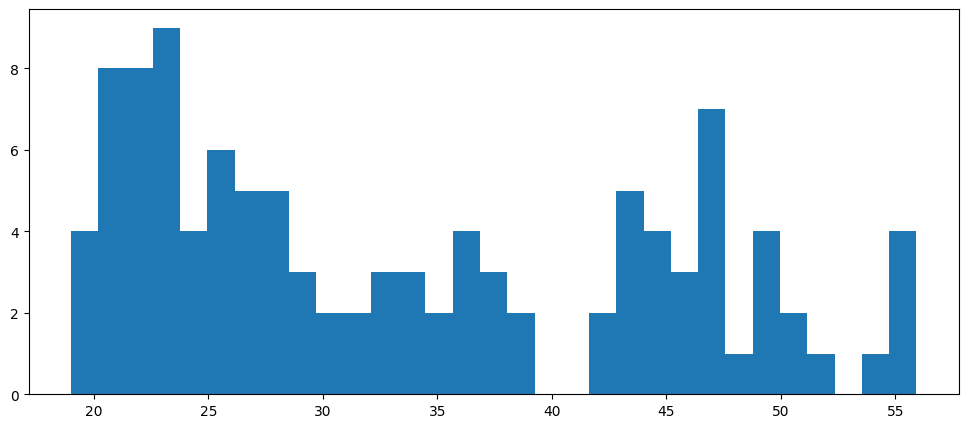

In [12]:
print("Num of Age data", df_demo["AgeYears"].dropna().shape[0], "over", df_demo.shape[0])
aute.stat_print(df_demo["AgeYears"], "Age")

plt.figure(figsize=(12, 5))
plt.hist(df_demo["AgeYears"], bins=31)

plt.show()

In [13]:
gender_f_name = "Marque con una su género:"
df_demo["GenderFem"] = (df_demo[gender_f_name] == "Femenino")*1
df_demo["GenderOther"] = ((df_demo[gender_f_name] != "Femenino") * (df_demo[gender_f_name] != "Masculino"))*1
df_demo[["GenderFem", "GenderOther"]].head(8)

,GenderFem,GenderOther
0,1,0
1,1,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0


In [15]:
v_f_name = "Sueles jugar a videojuegos de aventura, acción, estrategia, simulación, MMORPG?"
v_num_f_name = "Unnamed: 35"

df_demo[v_num_f_name] = df_demo[v_num_f_name].replace({"1.5h": 1.5, "1 hora": 1})

print(df_demo[v_f_name].unique())

num_h_play_list = []
for v in df_demo[v_num_f_name].values:
    if isinstance(v, str):
        if v == "< 30 min":
            num_h_play_list.append(0.25)
        elif v == "menos de una":
            num_h_play_list.append(0.5)
        elif v == "entre 30 y 60 minutos":
            num_h_play_list.append(0.75)
        else:
            num_h_play_list.append(float(v.split()[0]))
    else:
        num_h_play_list.append(v)

df_demo["NumHPlayVGame"] = num_h_play_list

df_demo["PlayVGame"] = (df_demo[v_f_name] == "Sí, estimas de numero de horas que le dedicas cada día:")*1

df_demo[[v_f_name, "PlayVGame", v_num_f_name, "NumHPlayVGame"]].head(8)

['Sí, estimas de numero de horas que le dedicas cada día:' 'No' nan]


,"Sueles jugar a videojuegos de aventura, acción, estrategia, simulación, MMORPG?",PlayVGame,Unnamed: 35,NumHPlayVGame
0,"Sí, estimas de numero de horas que le dedicas ...",1,< 30 min,0.25
1,No,0,NaN,NaN
2,"Sí, estimas de numero de horas que le dedicas ...",1,1,1.00
3,"Sí, estimas de numero de horas que le dedicas ...",1,2,2.00
4,No,0,NaN,NaN
5,"Sí, estimas de numero de horas que le dedicas ...",1,1,1.00
6,No,0,NaN,NaN
7,No,0,NaN,NaN


In [16]:
ps_f_name = "¿Has estado alguna vez en terapia psicológica?"
print(df_demo[ps_f_name].unique())

df_demo["OrdinalPs"] = [0] * df_demo.shape[0]

df_demo.loc[df_demo[ps_f_name]=="Sí, en el último año", "OrdinalPs"] = 1
df_demo.loc[df_demo[ps_f_name]=="Sí, hace más de 1 año", "OrdinalPs"] = 2
df_demo.loc[df_demo[ps_f_name]=="Sí, hace más de 5 años", "OrdinalPs"] = 3
df_demo.loc[pd.isna(df_demo[ps_f_name]), "OrdinalPs"] = -1

df_demo[[ps_f_name, "OrdinalPs"]].head(8)

['Sí, hace más de 5 años' 'Sí, en el último año' 'Nunca'
 'Sí, hace más de 2 años' 'Sí, hace más de 1 año' nan]


,¿Has estado alguna vez en terapia psicológica?,OrdinalPs
0,"Sí, hace más de 5 años",3
1,"Sí, en el último año",1
2,Nunca,0
3,"Sí, en el último año",1
4,"Sí, en el último año",1
5,Nunca,0
6,"Sí, hace más de 5 años",3
7,"Sí, hace más de 5 años",3


In [17]:
m_f_name = "¿Tomas alguna medicación psicofarmacológica?"
print(df_demo[m_f_name].unique())

df_demo["NoMedicine"] = ( (df_demo[m_f_name] == "No") | (pd.isna(df_demo[m_f_name])) ) * 1

df_demo[[m_f_name, "NoMedicine"]].head(8)

['No' 'Sí, antidepresivos' 'Otro (especifique)' nan 'Sí, ansiolíticos']


,¿Tomas alguna medicación psicofarmacológica?,NoMedicine
0,No,1
1,No,1
2,No,1
3,No,1
4,No,1
5,No,1
6,No,1
7,No,1


In [20]:
user_name_column = [user.replace("User", "USER") if isinstance(user, str) else np.nan for user in df_demo["Usuario"].values]
df_demo["SubjectId"] = user_name_column

In [22]:
df_demo.to_csv(path_to_cuest + "PostProcessedCuest/DemographicPostProc.csv", sep=";")
df_demo.shape

(114, 47)

In [14]:
with open('Results/NoDepressSubjects.txt', 'r') as f:
    subj_no_depress_list = f.readlines()
subj_no_depress_list = [subj.replace("\n", "") for subj in subj_no_depress_list]

In [15]:
df_demo = pd.read_csv(path_to_cuest + "PostProcessedCuest/DemographicPostProc.csv", sep=";")
idx_clean = []
for i_us, us in df_demo["SubjectId"].to_dict().items():
    if np.sum(np.array(subj_no_depress_list) == us) == 1:
        idx_clean.append(i_us)
    # else:
        # print(us)
# idx_clean = [i_us for i_us, us in enumerate(df_angry["Usuario"])]
df_demo = df_demo.loc[idx_clean]
print("Demo shape", df_demo.shape)

Demo shape (64, 48)


In [16]:
print(df_demo["AgeYears"].mean(), "+/-", df_demo["AgeYears"].std())

31.95609375 +/- 10.339144543715083


In [32]:
np.sum(df_demo["GenderFem"] == 1)

32

In [22]:
gender_f_name = "Marque con una su género:"
np.sum(df_demo[gender_f_name] == "Masculino")

31

## LSAS

In [18]:
df_lsas = pd.read_excel("../Cuestionarios/CHATBOTs_LSAS.xlsx", skiprows=[1])
print(df_lsas.columns)
print("Shape", df_lsas.shape)
display(df_lsas.head(8))

Index(['respondent_id', 'collector_id', 'date_created', 'date_modified',
       'ip_address', 'email_address', 'first_name', 'last_name', 'custom_1',
       'Usuario',
       'Por favor, lea con atención cada grupo de afirmaciones y luego elija un afirmación de cada grupo, que mejor le representa COMO SE HA SENTIDO EN LAS ÚLTIMAS DOS SEMANAS.',
       'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14',
       'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22',
       'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26',
       'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30',
       'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33',
       'Por favor, lea con atención cada grupo de afirmaciones y luego elija un afirmación de cada grupo, que mejor le representa COMO SE HA SENTIDO EN LAS ÚLTIMAS DOS SEMANAS..1',
       'Unnamed: 35', 'Unnamed: 36', 'Unnamed: 37', 'Unnamed: 38',
       'Unnamed: 3

,respondent_id,collector_id,date_created,date_modified,ip_address,email_address,first_name,last_name,custom_1,Usuario,...,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57
0,118255084154,448135553,2023-02-28 08:41:36,2023-02-28 09:16:00,158.42.142.216,NaN,NaN,NaN,NaN,USER_50_CB2,...,Frecuentemente lo evito,En ocasiones lo evito,Nunca lo evito,Frecuentemente lo evito,Nunca lo evito,Nunca lo evito,Habitualmente lo evit,Nunca lo evito,Nunca lo evito,Nunca lo evito
1,118253989624,448135553,2023-02-27 12:51:53,2023-02-27 13:15:35,158.42.142.216,NaN,NaN,NaN,NaN,USER_49_CB2,...,Frecuentemente lo evito,En ocasiones lo evito,Habitualmente lo evit,En ocasiones lo evito,Frecuentemente lo evito,En ocasiones lo evito,Frecuentemente lo evito,Nunca lo evito,Nunca lo evito,En ocasiones lo evito
2,118253918867,448135553,2023-02-27 11:05:05,2023-02-27 11:19:39,158.42.142.216,NaN,NaN,NaN,NaN,USER_48_CB2,...,Nunca lo evito,Nunca lo evito,Nunca lo evito,Nunca lo evito,Nunca lo evito,Nunca lo evito,Nunca lo evito,Nunca lo evito,Nunca lo evito,Nunca lo evito
3,118253848148,448135553,2023-02-27 08:58:47,2023-02-27 09:15:46,158.42.142.216,NaN,NaN,NaN,NaN,USER_47_CB2,...,Habitualmente lo evit,Frecuentemente lo evito,Nunca lo evito,En ocasiones lo evito,En ocasiones lo evito,Nunca lo evito,Frecuentemente lo evito,Nunca lo evito,Nunca lo evito,Nunca lo evito
4,118252044991,448135553,2023-02-24 12:56:25,2023-02-24 13:11:51,158.42.142.216,NaN,NaN,NaN,NaN,USER_46_CB2,...,En ocasiones lo evito,Frecuentemente lo evito,Frecuentemente lo evito,En ocasiones lo evito,Frecuentemente lo evito,Nunca lo evito,Frecuentemente lo evito,Frecuentemente lo evito,Frecuentemente lo evito,Frecuentemente lo evito
5,118251989659,448135553,2023-02-24 11:26:28,2023-02-24 11:40:23,158.42.142.216,NaN,NaN,NaN,NaN,USER_45_CB2,...,Nunca lo evito,En ocasiones lo evito,Frecuentemente lo evito,En ocasiones lo evito,En ocasiones lo evito,En ocasiones lo evito,Nunca lo evito,Nunca lo evito,Nunca lo evito,Nunca lo evito
6,118251903470,448135553,2023-02-24 08:45:37,2023-02-24 09:24:06,158.42.142.216,NaN,NaN,NaN,NaN,USER_44_CB2,...,Frecuentemente lo evito,En ocasiones lo evito,En ocasiones lo evito,En ocasiones lo evito,En ocasiones lo evito,Nunca lo evito,Nunca lo evito,Nunca lo evito,Nunca lo evito,En ocasiones lo evito
7,118251078527,448135553,2023-02-23 13:00:05,2023-02-23 13:08:37,158.42.142.216,NaN,NaN,NaN,NaN,USER_43_CB2,...,Nunca lo evito,Nunca lo evito,Nunca lo evito,Nunca lo evito,Nunca lo evito,Nunca lo evito,Nunca lo evito,Nunca lo evito,Nunca lo evito,Nunca lo evito


## N1 and N2

In [19]:
df_n1 = pd.read_excel("../Cuestionarios/CHATBOTs_N1.xlsx", skiprows=[1])
print(df_n1.columns)
print("Shape", df_n1.shape)
display(df_n1.head(8))

Index(['respondent_id', 'collector_id', 'date_created', 'date_modified',
       'ip_address', 'email_address', 'first_name', 'last_name', 'custom_1',
       'Usuario',
       'Tienes que elegir un numero entre 1 y 7, siendo 1 “me he notado muy forzado durante la conversación” y 7 “me he notado muy natural durante la conversación”.',
       'Tienes que elegir un numero entre 1 y 7, siendo 1 “ha sido una conversación artificial. No se parece nada a una conversación real” y 7 “ha sido una conversación realista. El contenido ha sido muy parecido a lo de una conversación real”.',
       'Siendo 1 "muy negativa", 5 "neutral" y 9 "muy positiva". Indica tu nivel de valencia de la conversación.',
       'Siendo 1 el estado de calma, 5 el estado normal y 9 el estado de excitación intensa. Indica tu nivel de arousal.',
       'El nivel en que has sentido que dominabas (controlabas a nivel emocional) el contenido de la conversación. Siendo 1 "no dominante", 5 "normal" y 9 "muy dominante". Indica t

,respondent_id,collector_id,date_created,date_modified,ip_address,email_address,first_name,last_name,custom_1,Usuario,...,Relajado,Sorpresa,Tristeza,Disgusto.1,Felicidad.1,Enfado.1,Miedo.1,Relajado.1,Sorpresa.1,Tristeza.1
0,114256698163,423466282,2023-02-28 10:29:09,2023-02-28 10:35:54,158.42.142.216,NaN,NaN,NaN,NaN,USER_50_CB2,...,30.0,1.0,1.0,1.0,73.0,1.0,1.0,71.0,2.0,1.0
1,114255802040,423466282,2023-02-27 14:03:33,2023-02-27 14:12:58,158.42.142.216,NaN,NaN,NaN,NaN,USER_49_CB2,...,50.0,2.0,50.0,4.0,77.0,5.0,4.0,94.0,50.0,3.0
2,114255713052,423466282,2023-02-27 12:11:27,2023-02-27 12:18:52,158.42.142.216,NaN,NaN,NaN,NaN,USER_48_CB2,...,57.0,9.0,0.0,1.0,0.0,0.0,1.0,34.0,1.0,0.0
3,114255638760,423466282,2023-02-27 09:59:29,2023-02-27 10:14:32,158.42.142.216,NaN,NaN,NaN,NaN,USER_47_CB2,...,100.0,4.0,1.0,2.0,14.0,1.0,1.0,100.0,1.0,1.0
4,114253859965,423466282,2023-02-24 13:55:08,2023-02-24 14:01:21,158.42.142.216,NaN,NaN,NaN,NaN,USER_46_CB2,...,12.0,0.0,0.0,48.0,0.0,17.0,0.0,50.0,28.0,63.0
5,114253803194,423466282,2023-02-24 12:02:06,2023-02-24 12:17:53,158.42.142.216,NaN,NaN,NaN,NaN,USER_45_CB2,...,51.0,33.0,31.0,17.0,31.0,17.0,17.0,50.0,32.0,16.0
6,114253749077,423466282,2023-02-24 10:21:00,2023-02-24 10:32:01,158.42.142.216,NaN,NaN,NaN,NaN,USER_44_CB2,...,81.0,9.0,5.0,2.0,10.0,0.0,0.0,2.0,2.0,0.0
7,114252802736,423466282,2023-02-23 13:34:08,2023-02-23 13:44:44,158.42.142.216,NaN,NaN,NaN,NaN,USER_43_CB2,...,50.0,50.0,1.0,1.0,1.0,1.0,1.0,3.0,2.0,1.0


In [20]:
old_columns_name = [
    'Tienes que elegir un numero entre 1 y 7, siendo 1 “me he notado muy forzado durante la conversación” y 7 “me he notado muy natural durante la conversación”.',
    'Tienes que elegir un numero entre 1 y 7, siendo 1 “ha sido una conversación artificial. No se parece nada a una conversación real” y 7 “ha sido una conversación realista. El contenido ha sido muy parecido a lo de una conversación real”.',
    'Siendo 1 "muy negativa", 5 "neutral" y 9 "muy positiva". Indica tu nivel de valencia de la conversación.',
    'Siendo 1 el estado de calma, 5 el estado normal y 9 el estado de excitación intensa. Indica tu nivel de arousal.',
    'El nivel en que has sentido que dominabas (controlabas a nivel emocional) el contenido de la conversación. Siendo 1 "no dominante", 5 "normal" y 9 "muy dominante". Indica tu nivel de dominancia emocional.',
    'Siendo 1 "muy negativa", 5 "neutral" y 9 "muy positiva". Indica el nivel de valencia DEL AVATAR durante la conversación',
    'Siendo 1 el estado de calma, 5 el estado normal y 9 el estado de excitación intensa. Indica el nivel de arousal DEL AVATAR durante la conversación.',
    'El nivel en que ha sentido que EL AVATAR estaba dominado (controlando a nivel emocional) el contenido de la conversación. Siendo 1 "no dominante", 5 "normal" y 9 "muy dominante". Indica el nivel de dominancia emocional DEL AVATAR.'
]

new_columns_name = [
    "Question1", "Question2", "Question3", "Question4", "Question5", "Question6", "Question7", "Question8"
]

change_name_column_dict = dict(zip(old_columns_name, new_columns_name))

In [21]:
for old_c, new_c in change_name_column_dict.items():
    new_col_list = [int(v.split(".")[0]) if isinstance(v, str) else int(v) for v in df_n1[old_c].values]
    df_n1[new_c] = new_col_list
    
display(df_n1[new_columns_name].head(8))

,Question1,Question2,Question3,Question4,Question5,Question6,Question7,Question8
0,4,5,7,5,3,7,2,6
1,2,6,5,6,4,7,2,6
2,2,2,5,2,6,4,5,2
3,4,3,5,1,3,5,1,6
4,6,5,2,5,8,3,4,6
5,2,2,4,3,7,5,5,5
6,4,6,5,2,8,5,1,2
7,4,5,7,3,5,5,5,5


## Percepción avatares

In [22]:
df_pa = pd.read_excel("../Cuestionarios/CHATBOTs_PERCEPCIÓN_AVATARES.xlsx", skiprows=[1])
print(df_pa.columns)
print("Shape", df_pa.shape)
display(df_pa.head(8))

Index(['respondent_id', 'collector_id', 'date_created', 'date_modified',
       'ip_address', 'email_address', 'first_name', 'last_name', 'custom_1',
       'Usuario',
       'Pensando en los avatares con los que acabas de hablar, evalúa el contenido de las siguientes frases:',
       'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14',
       'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22',
       'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26',
       'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29'],
      dtype='object')
Shape (106, 30)


,respondent_id,collector_id,date_created,date_modified,ip_address,email_address,first_name,last_name,custom_1,Usuario,...,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29
0,118255171482,448444258,2023-02-28 10:56:33,2023-02-28 11:11:50,158.42.142.216,NaN,NaN,NaN,NaN,USER_50_CB2,...,De acuerdo,De acuerdo,Neutral,De acuerdo,De acuerdo,Muy de acuerdo,En desacuerdo,En desacuerdo,Neutral,De acuerdo
1,118254072057,448444258,2023-02-27 14:45:10,2023-02-27 14:57:19,158.42.142.216,NaN,NaN,NaN,NaN,USER_49_CB2,...,Muy de acuerdo,Muy de acuerdo,De acuerdo,De acuerdo,Neutral,Neutral,Muy de acuerdo,En desacuerdo,De acuerdo,De acuerdo
2,118253969406,448444258,2023-02-27 12:39:45,2023-02-27 12:42:15,158.42.142.216,NaN,NaN,NaN,NaN,USER_48_CB2,...,Muy en desacuerdo,En desacuerdo,Muy en desacuerdo,En desacuerdo,Muy en desacuerdo,Muy en desacuerdo,Muy en desacuerdo,Muy en desacuerdo,En desacuerdo,En desacuerdo
3,118253908359,448444258,2023-02-27 10:56:44,2023-02-27 11:03:46,158.42.142.216,NaN,NaN,NaN,NaN,USER_47_CB2,...,En desacuerdo,Neutral,En desacuerdo,De acuerdo,Neutral,Neutral,En desacuerdo,De acuerdo,Neutral,Neutral
4,118252112778,448444258,2023-02-24 14:41:03,2023-02-24 14:44:48,158.42.142.216,NaN,NaN,NaN,NaN,USER_46_CB2,...,Neutral,Neutral,De acuerdo,De acuerdo,En desacuerdo,En desacuerdo,NaN,De acuerdo,De acuerdo,En desacuerdo
5,118252034777,448444258,2023-02-24 12:50:46,2023-02-24 12:53:58,158.42.142.216,NaN,NaN,NaN,NaN,USER_45_CB2,...,En desacuerdo,En desacuerdo,Neutral,En desacuerdo,En desacuerdo,En desacuerdo,En desacuerdo,En desacuerdo,En desacuerdo,En desacuerdo
6,118251982310,448444258,2023-02-24 11:14:47,2023-02-24 11:25:48,158.42.142.216,NaN,NaN,NaN,NaN,USER_44_CB2,...,En desacuerdo,Neutral,Neutral,De acuerdo,De acuerdo,Neutral,En desacuerdo,De acuerdo,De acuerdo,De acuerdo
7,118251118792,448444258,2023-02-23 14:09:51,2023-02-23 14:12:12,158.42.142.216,NaN,NaN,NaN,NaN,USER_43_CB2,...,De acuerdo,De acuerdo,De acuerdo,Neutral,Neutral,De acuerdo,De acuerdo,De acuerdo,Neutral,Neutral


## Avatars

### Happy

In [23]:
df_happy = pd.read_excel("../Cuestionarios/CHATBOTs_F.xlsx", skiprows=[1])
print(df_happy.shape)
print(df_happy.columns)

(105, 32)
Index(['respondent_id', 'collector_id', 'date_created', 'date_modified',
       'ip_address', 'email_address', 'first_name', 'last_name', 'custom_1',
       'Usuario',
       'Tienes que elegir un numero entre 1 y 7, siendo 1 “me he notado muy forzado durante la conversación” y 7 “me he notado muy natural durante la conversación”.',
       'Tienes que elegir un numero entre 1 y 7, siendo 1 “ha sido una conversación artificial. No se parece nada a una conversación real” y 7 “ha sido una conversación realista. El contenido ha sido muy parecido a lo de una conversación real”.',
       'Siendo 1 "muy negativa", 5 "neutral" y 9 "muy positiva". Indica tu nivel de valencia de la conversación.',
       'Siendo 1 el estado de calma, 5 el estado normal y 9 el estado de excitación intensa. Indica tu nivel de arousal.',
       'El nivel en que has sentido que dominabas (controlabas a nivel emocional) el contenido de la conversación. Siendo 1 "no dominante", 5 "normal" y 9 "muy dominante"

In [24]:
# ###########################
# ### Change column names ###
# ###########################

old_columns_name = [
    'Tienes que elegir un numero entre 1 y 7, siendo 1 “me he notado muy forzado durante la conversación” y 7 “me he notado muy natural durante la conversación”.',
    'Tienes que elegir un numero entre 1 y 7, siendo 1 “ha sido una conversación artificial. No se parece nada a una conversación real” y 7 “ha sido una conversación realista. El contenido ha sido muy parecido a lo de una conversación real”.',
    'Siendo 1 "muy negativa", 5 "neutral" y 9 "muy positiva". Indica tu nivel de valencia de la conversación.',
    'Siendo 1 el estado de calma, 5 el estado normal y 9 el estado de excitación intensa. Indica tu nivel de arousal.',
    'El nivel en que has sentido que dominabas (controlabas a nivel emocional) el contenido de la conversación. Siendo 1 "no dominante", 5 "normal" y 9 "muy dominante". Indica tu nivel de dominancia emocional.',
    'Siendo 1 "muy negativa", 5 "neutral" y 9 "muy positiva". Indica el nivel de valencia DEL AVATAR durante la conversación',
    'Siendo 1 el estado de calma, 5 el estado normal y 9 el estado de excitación intensa. Indica el nivel de arousal DEL AVATAR durante la conversación.',
    'El nivel en que ha sentido que EL AVATAR estaba dominado (controlando a nivel emocional) el contenido de la conversación. Siendo 1 "no dominante", 5 "normal" y 9 "muy dominante". Indica el nivel de dominancia emocional DEL AVATAR.'
]

new_columns_name = [
    "Question1", "Question2", "Question3", "Question4", "Question5", "Question6", "Question7", "Question8"
]

change_name_column_dict = dict(zip(old_columns_name, new_columns_name))

df_happy = df_happy.rename(columns=change_name_column_dict)

# #########################
# ### Change categories ###
# #########################

from_one_to_seven = {
    '1. Muy forzado': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7. Muy natural': 7
}
from_one_to_seven_2 = {
    '1. Muy artificial': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7. Muy realista': 7
}
from_one_to_nine = {
    '1. Muy negativa': 1, '2': 2, '3': 3, '4': 4, '5. Neutral': 5, '6': 6, '7': 7, '8': 8, '9. Muy positiva': 9
}
from_one_to_nine_arousal = {
    '1. Ninguno': 1, '2': 2, '3': 3, '4': 4, '5. Normal': 5, '6': 6, '7': 7, '8': 8, '9. Mucho': 9
}
from_one_to_nine_dom = {
    '1. No dominante': 1, '2': 2, '3': 3, '4': 4, '5. Normal': 5, '6': 6, '7': 7, '8': 8, '9. Muy dominante': 9
}
from_one_to_nine_pos = {
    '1. Muy negativa': 1, '2': 2, '3': 3, '4': 4, '5. Neutral': 5, '6': 6, '7': 7, '8': 8, '9. Muy positiva': 9
}
from_one_to_nine_calm = {
    '1. Calma': 1, '2': 2, '3': 3, '4': 4, '5. Normal': 5, '6': 6, '7': 7, '8': 8, '9. Excitación': 9
}
categories_dict_list = [
    from_one_to_seven,
    from_one_to_seven_2,
    from_one_to_nine,
    from_one_to_nine_arousal,
    from_one_to_nine_dom,
    from_one_to_nine_pos,
    from_one_to_nine_calm,
    from_one_to_nine_dom
]

change_value_per_column_dict = dict(zip(new_columns_name, categories_dict_list))

df_happy = df_happy.replace(change_value_per_column_dict)

### All avatars

In [25]:
personality_cuest_list = ["CHATBOTs_F", "CHATBOTs_T", "CHATBOTs_E", "CHATBOTs_R", "CHATBOTs_N1", "CHATBOTs_N2"]
personality_cuest_to_save_list = [
    "CuestAvatarHappy", "CuestAvatarSad", "CuestAvatarAngry", "CuestAvatarRelax", "CuestAvatarN1", "CuestAvatarN2"
]

for i_pers, pers in enumerate(personality_cuest_list):
    data = pd.read_excel(path_to_cuest + pers + ".xlsx", skiprows=[1])
    
    user_name_column = [user.replace("User", "USER") if isinstance(user, str) else np.nan for user in data["Usuario"].values]
    data["SubjectId"] = user_name_column
    
    # ###########################
    # ### Change column names ###
    # ###########################

    old_columns_name = [
        'Tienes que elegir un numero entre 1 y 7, siendo 1 “me he notado muy forzado durante la conversación” y 7 “me he notado muy natural durante la conversación”.',
        'Tienes que elegir un numero entre 1 y 7, siendo 1 “ha sido una conversación artificial. No se parece nada a una conversación real” y 7 “ha sido una conversación realista. El contenido ha sido muy parecido a lo de una conversación real”.',
        'Siendo 1 "muy negativa", 5 "neutral" y 9 "muy positiva". Indica tu nivel de valencia de la conversación.',
        'Siendo 1 el estado de calma, 5 el estado normal y 9 el estado de excitación intensa. Indica tu nivel de arousal.',
        'El nivel en que has sentido que dominabas (controlabas a nivel emocional) el contenido de la conversación. Siendo 1 "no dominante", 5 "normal" y 9 "muy dominante". Indica tu nivel de dominancia emocional.',
        'Siendo 1 "muy negativa", 5 "neutral" y 9 "muy positiva". Indica el nivel de valencia DEL AVATAR durante la conversación',
        'Siendo 1 el estado de calma, 5 el estado normal y 9 el estado de excitación intensa. Indica el nivel de arousal DEL AVATAR durante la conversación.',
        'El nivel en que ha sentido que EL AVATAR estaba dominado (controlando a nivel emocional) el contenido de la conversación. Siendo 1 "no dominante", 5 "normal" y 9 "muy dominante". Indica el nivel de dominancia emocional DEL AVATAR.'
    ]

    new_columns_name = [
        "Question1", "Question2", "Question3", "Question4", "Question5", "Question6", "Question7", "Question8"
    ]

    change_name_column_dict = dict(zip(old_columns_name, new_columns_name))

    data = data.rename(columns=change_name_column_dict)

    # #########################
    # ### Change categories ###
    # #########################

    from_one_to_seven = {
        '1. Muy forzado': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7. Muy natural': 7
    }
    from_one_to_seven_2 = {
        '1. Muy artificial': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7. Muy realista': 7
    }
    from_one_to_nine = {
        '1. Muy negativa': 1, '2': 2, '3': 3, '4': 4, '5. Neutral': 5, '6': 6, '7': 7, '8': 8, '9. Muy positiva': 9
    }
    from_one_to_nine_arousal = {
        '1. Ninguno': 1, '2': 2, '3': 3, '4': 4, '5. Normal': 5, '6': 6, '7': 7, '8': 8, 
        '9. Mucho': 9, "9. Intenso": 9
    }
    from_one_to_nine_dom = {
        '1. No dominante': 1, '2': 2, '3': 3, '4': 4, '5. Normal': 5, '6': 6, '7': 7, '8': 8, '9. Muy dominante': 9
    }
    from_one_to_nine_pos = {
        '1. Muy negativa': 1, '2': 2, '3': 3, '4': 4, '5. Neutral': 5, '6': 6, '7': 7, '8': 8, '9. Muy positiva': 9
    }
    from_one_to_nine_calm = {
        '1. Calma': 1, "1. Ninguno": 1,
        '2': 2, '3': 3, '4': 4, '5. Normal': 5, '6': 6, '7': 7, '8': 8, '9. Excitación': 9, "9. Intenso": 9
    }
    categories_dict_list = [
        from_one_to_seven,
        from_one_to_seven_2,
        from_one_to_nine,
        from_one_to_nine_arousal,
        from_one_to_nine_dom,
        from_one_to_nine_pos,
        from_one_to_nine_calm,
        from_one_to_nine_dom
    ]

    change_value_per_column_dict = dict(zip(new_columns_name, categories_dict_list))

    data = data.replace(change_value_per_column_dict)
    
    for col in new_columns_name:
        if data[col].dtype == "O":
            # The possible strings that are in a column are removed checking if they are strings or not.
            
            data_to_col_list = []
            for v in data[col]:
                if isinstance(v, str):
                    data_to_col_list.append(int(v.split(".")[0]))
                elif np.isnan(v):
                    data_to_col_list.append(np.nan)
                else:
                    int(v)
    
    data.to_csv(path_to_cuest + "PostProcessedCuest/" + personality_cuest_to_save_list[i_pers] + ".csv", sep=",")
    

In [26]:
2+2

4

## PHQ-9

In [4]:
df_phq9 = pd.read_excel("../Cuestionarios/CHATBOTs_PHQ-9.xlsx", skiprows=[1])
user_name_column = [user.replace("User", "USER") if isinstance(user, str) else np.nan for user in df_phq9["Usuario"].values]
df_phq9["SubjectId"] = user_name_column

In [5]:
cols_to_sum = [
    'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14',
    'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
    'Unnamed: 19'
]

dict_to_replace = {
    "Ningún dia": 0,
    "Varios días": 1,
    "Más de la mitad de los días": 2,
    "Casi todos los días": 3
}

In [6]:
for col in cols_to_sum:
    df_phq9[col] = df_phq9[col].replace(dict_to_replace)

In [7]:
np.nansum(df_phq9[cols_to_sum], axis=1)

array([12., 14.,  7.,  9., 12.,  7., 13.,  3.,  8., 17.,  6.,  7.,  3.,
       10., 10., 17., 11., 12., 11., 15., 15., 11., 12., 12., 16., 12.,
        8., 15., 12., 19., 11., 21., 18.,  5., 13.,  1., 13., 10.,  7.,
       11.,  9.,  9., 16.,  1.,  4.,  6.,  2.,  1.,  4.,  2.,  8.,  0.,
        0.,  0.,  2.,  1.,  2.,  4.,  8.,  5.,  2.,  3.,  0.,  2.,  5.,
        0.,  0.,  2.,  5.,  4.,  4.,  1.,  6.,  1., 23., 12.,  9.,  2.,
        1.,  2., 14.,  4.,  3.,  4.,  2.,  5.,  1.,  9.,  4.,  2., 18.,
        8.,  8.,  3.,  2.,  0.,  3.,  8., 10.,  1., 14.,  6., 10.,  2.,
        2.,  2., 16.,  3.,  3.,  5.,  8.,  0.,  3.])

In [8]:
df_phq9["TotalSum"] = np.nansum(df_phq9[cols_to_sum], axis=1)

In [9]:
phq9_th_depress = 10

In [10]:
all_users_no_depress = df_phq9[df_phq9["TotalSum"] > 9]["Usuario"].values
subj_no_depress_list = [
    subj for subj in all_users_no_depress if isinstance(subj, str) and "CB" in subj and not "P" in subj
]
print("Below 5 = ", len(subj_no_depress_list))

Below 5 =  36


In [11]:
all_users_no_depress = df_phq9[df_phq9["TotalSum"] < 5]["Usuario"].values
subj_no_depress_list = [
    subj for subj in all_users_no_depress if isinstance(subj, str) and "CB" in subj and not "P" in subj
]
print("Below 5 = ", len(subj_no_depress_list))

Below 5 =  40


In [12]:
all_users_no_depress = df_phq9[df_phq9["TotalSum"] < phq9_th_depress]["SubjectId"].values
subj_no_depress_list = [
    subj for subj in all_users_no_depress if isinstance(subj, str) and "CB" in subj and not "P" in subj
]
print("Num of subjects", len(subj_no_depress_list))
subj_no_depress_list

Num of subjects 64


['USER_48_CB2',
 'USER_47_CB2',
 'USER_45_CB2',
 'USER_43_CB2',
 'USER_42_CB2',
 'USER_40_CB2',
 'USER_39_CB2',
 'USER_38_CB2',
 'USER_24_CB2',
 'USER_17_CB2',
 'USER_15_CB2',
 'USER_12_CB2',
 'USER_10_CB2',
 'USER_09_CB2',
 'USER_07_CB2',
 'USER_06_CB2',
 'USER_05_CB2',
 'USER_04_CB2',
 'USER_03_CB2',
 'USER_02_CB2',
 'USER_01_CB2',
 'USER_52_CB',
 'USER_51_CB',
 'USER_50_CB',
 'USER_49_CB',
 'USER_48_CB',
 'USER_47_CB',
 'USER_46_CB',
 'USER_45_CB',
 'USER_44_CB',
 'USER_43_CB',
 'USER_42_CB',
 'USER_41_CB',
 'USER_40_CB',
 'USER_39_CB',
 'USER_38_CB',
 'USER_37_CB',
 'USER_36_CB',
 'USER_35_CB',
 'USER_34_CB',
 'USER_33_CB',
 'USER_30_CB',
 'USER_29_CB',
 'USER_28_CB',
 'USER_27_CB',
 'USER_25_CB',
 'USER_24_CB',
 'USER_23_CB',
 'USER_22_CB',
 'USER_21_CB',
 'USER_20_CB',
 'USER_19_CB',
 'USER_18_CB',
 'USER_17_CB',
 'USER_15_CB',
 'USER_14_CB',
 'USER_13_CB',
 'USER_10_CB',
 'USER_09_CB',
 'USER_07_CB',
 'USER_05_CB',
 'USER_03_CB',
 'USER_02_CB',
 'USER_01_CB']

In [13]:
subj_list_x = [
    'USER_48_CB2', 'USER_47_CB2', 'USER_45_CB2', 'USER_43_CB2',
    'USER_42_CB2', 'USER_38_CB2', 'USER_40_CB2', 'USER_24_CB2',
    'USER_17_CB2', 'USER_15_CB2', 'USER_12_CB2', 'USER_09_CB2',
    'USER_07_CB2', 'USER_06_CB2', 'USER_05_CB2', 'USER_04_CB2',
    'USER_03_CB2', 'USER_02_CB2', 'USER_01_CB2', 'USER_52_CB',
    'USER_51_CB', 'USER_50_CB', 'USER_49_CB', 'USER_48_CB',
    'USER_47_CB', 'USER_46_CB', 'USER_45_CB', 'USER_44_CB',
    'USER_43_CB', 'USER_42_CB', 'USER_41_CB', 'USER_40_CB',
    'USER_39_CB', 'USER_38_CB', 'USER_37_CB', 'USER_36_CB',
    'USER_35_CB', 'USER_34_CB', 'USER_33_CB', 'USER_30_CB',
    'USER_29_CB', 'USER_28_CB', 'USER_27_CB', 'USER_25_CB',
    'USER_24_CB', 'USER_23_CB', 'USER_22_CB', 'USER_21_CB',
    'USER_20_CB', 'USER_19_CB', 'USER_18_CB', 'USER_17_CB',
    'USER_15_CB', 'USER_14_CB', 'USER_13_CB', 'USER_10_CB',
    'USER_09_CB', 'USER_07_CB', 'USER_05_CB', 'USER_03_CB',
    'USER_02_CB', 'USER_01_CB'
]

for subj in subj_no_depress_list:
    if subj not in subj_list_x:
        print(subj)

USER_39_CB2
USER_10_CB2


In [14]:
with open('Results/NoDepressSubjects.txt', 'w') as f:
    f.writelines("\n".join(subj_no_depress_list))

In [15]:
good_idx = [i_us for i_us, us in enumerate(df_phq9["Usuario"].values) if isinstance(us, str) and "_CB" in us]

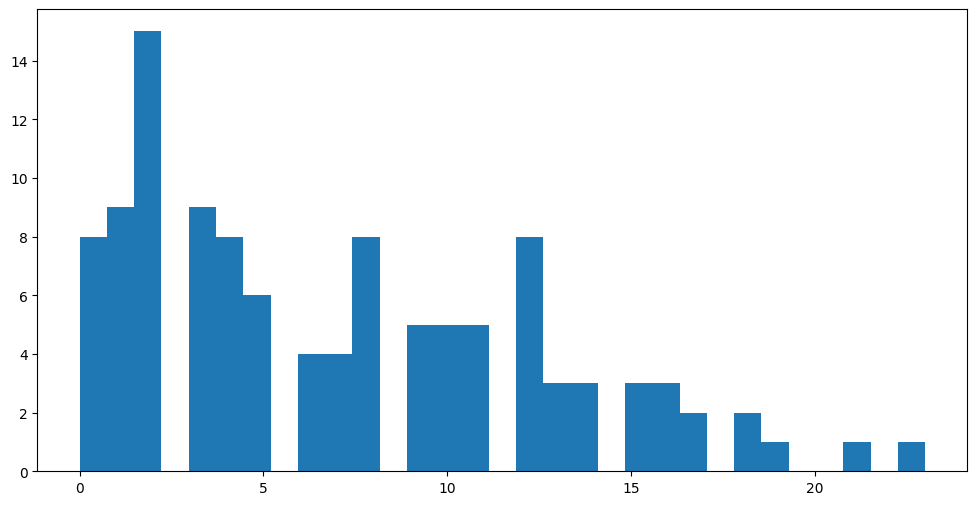

In [16]:
# print("Number below 5 = ", np.sum(df_phq9["TotalSum"].dropna() < 5))
# print("Number below 10 = ", np.sum(df_phq9["TotalSum"].dropna() < 10))

plt.figure(figsize=(12, 6))

plt.hist(df_phq9["TotalSum"], bins=31)

plt.show()

# Cuest Analysis

In [17]:
df_angry = pd.read_csv("../Cuestionarios/PostProcessedCuest/CuestAvatarAngry.csv")
idx_clean = []
for i_us, us in df_angry["SubjectId"].to_dict().items():
    if np.sum(np.array(subj_no_depress_list) == us) == 1:
        idx_clean.append(i_us)
    # else:
        # print(us)
# idx_clean = [i_us for i_us, us in enumerate(df_angry["Usuario"])]
df_angry = df_angry.loc[idx_clean]
df_angry["Personality"] = "Angry"
print("Angry shape", df_angry.shape)

df_happy = pd.read_csv("../Cuestionarios/PostProcessedCuest/CuestAvatarHappy.csv")
idx_clean = []
for i_us, us in df_happy["SubjectId"].to_dict().items():
    if np.sum(np.array(subj_no_depress_list) == us) == 1:
        idx_clean.append(i_us)
# idx_clean = [i_us for i_us, us in enumerate(df_angry["Usuario"])]
df_happy = df_happy.loc[idx_clean]
df_happy["Personality"] = "Happy"

df_relax = pd.read_csv("../Cuestionarios/PostProcessedCuest/CuestAvatarRelax.csv")
idx_clean = []
for i_us, us in df_relax["SubjectId"].to_dict().items():
    if np.sum(np.array(subj_no_depress_list) == us) == 1:
        idx_clean.append(i_us)
# idx_clean = [i_us for i_us, us in enumerate(df_angry["Usuario"])]
df_relax = df_relax.loc[idx_clean]
df_relax["Personality"] = "Relax"

df_sad = pd.read_csv("../Cuestionarios/PostProcessedCuest/CuestAvatarSad.csv")
idx_clean = []
for i_us, us in df_sad["SubjectId"].to_dict().items():
    if np.sum(np.array(subj_no_depress_list) == us) == 1:
        idx_clean.append(i_us)
# idx_clean = [i_us for i_us, us in enumerate(df_angry["Usuario"])]
df_sad = df_sad.loc[idx_clean]
df_sad["Personality"] = "Sad"

df_neutral1 = pd.read_csv("../Cuestionarios/PostProcessedCuest/CuestAvatarN1.csv")
idx_clean = []
for i_us, us in df_neutral1["SubjectId"].to_dict().items():
    if np.sum(np.array(subj_no_depress_list) == us) == 1:
        idx_clean.append(i_us)
# idx_clean = [i_us for i_us, us in enumerate(df_angry["Usuario"])]
df_neutral1 = df_neutral1.loc[idx_clean]
df_neutral1["Personality"] = "Neutral1"

df_neutral2 = pd.read_csv("../Cuestionarios/PostProcessedCuest/CuestAvatarN2.csv")
idx_clean = []
for i_us, us in df_neutral2["SubjectId"].to_dict().items():
    if np.sum(np.array(subj_no_depress_list) == us) == 1:
        idx_clean.append(i_us)
# idx_clean = [i_us for i_us, us in enumerate(df_angry["Usuario"])]
df_neutral2 = df_neutral2.loc[idx_clean]
df_neutral2["Personality"] = "Neutral2"

df_all_cuest = pd.concat([df_angry, df_happy, df_relax, df_sad, df_neutral1, df_neutral2]).reset_index(drop=True)
print("Shape of all", df_all_cuest.shape)

Angry shape (62, 35)
Shape of all (379, 35)


In [18]:
df_all_cuest["SubjectId"].unique()

array(['USER_48_CB2', 'USER_47_CB2', 'USER_45_CB2', 'USER_43_CB2',
       'USER_42_CB2', 'USER_38_CB2', 'USER_40_CB2', 'USER_24_CB2',
       'USER_17_CB2', 'USER_15_CB2', 'USER_12_CB2', 'USER_09_CB2',
       'USER_07_CB2', 'USER_06_CB2', 'USER_05_CB2', 'USER_04_CB2',
       'USER_03_CB2', 'USER_02_CB2', 'USER_01_CB2', 'USER_52_CB',
       'USER_51_CB', 'USER_50_CB', 'USER_49_CB', 'USER_48_CB',
       'USER_47_CB', 'USER_46_CB', 'USER_45_CB', 'USER_44_CB',
       'USER_43_CB', 'USER_42_CB', 'USER_41_CB', 'USER_40_CB',
       'USER_39_CB', 'USER_38_CB', 'USER_37_CB', 'USER_36_CB',
       'USER_35_CB', 'USER_34_CB', 'USER_33_CB', 'USER_30_CB',
       'USER_29_CB', 'USER_28_CB', 'USER_27_CB', 'USER_25_CB',
       'USER_24_CB', 'USER_23_CB', 'USER_22_CB', 'USER_21_CB',
       'USER_20_CB', 'USER_19_CB', 'USER_18_CB', 'USER_17_CB',
       'USER_15_CB', 'USER_14_CB', 'USER_13_CB', 'USER_10_CB',
       'USER_09_CB', 'USER_07_CB', 'USER_05_CB', 'USER_03_CB',
       'USER_02_CB', 'USER_01_CB', '

### Natural and realism

In [ ]:
sp.stats.normaltest()

In [26]:
df_all_cuest["NewPersonality"] = df_all_cuest["Personality"]
df_all_cuest["NewPersonality"] = df_all_cuest["NewPersonality"].replace({"Neutral1":"Neutral", "Neutral2":"Neutral"})
df_all_cuest["Emotional"] = df_all_cuest["NewPersonality"] != "Neutral"

### Start correction reviewers

In [29]:
df_nr_save_list = []
for pers, df_pers in df_all_cuest.groupby("Personality"):
    df_nr_save_list.append(df_pers[["Question1", "Question2", "SubjectId", "Personality"]])

df_nr = pd.concat(df_nr_save_list).reset_index(drop=True)

In [31]:
df_nr["Personality"].unique()

array(['Angry', 'Happy', 'Neutral1', 'Neutral2', 'Relax', 'Sad'],
      dtype=object)

In [44]:
df_nr_filter_list = []
for subj, df_subj in df_nr.groupby("SubjectId"):
    if df_subj.shape[0] != 6:
        continue
    
    q1_n1 = df_subj[df_subj["Personality"] == "Neutral1"]["Question1"]
    q1_n2 = df_subj[df_subj["Personality"] == "Neutral2"]["Question1"]
    
    q2_n1 = df_subj[df_subj["Personality"] == "Neutral1"]["Question2"]
    q2_n2= df_subj[df_subj["Personality"] == "Neutral2"]["Question2"]

    df_nr_filter_list.append({
        "Question1": np.mean([q1_n1, q1_n2]),
        "Question2": np.mean([q2_n1, q2_n2]),
        "SubjectId": subj,
        "Personality": "Neutral"
    })

    for state in ["Angry", "Happy", "Relax", "Sad"]:
        df_nr_filter_list.append(dict(zip(df_subj.columns, df_subj[df_subj["Personality"] == state].values[0])))

df_nr_filter = pd.DataFrame(df_nr_filter_list)

Compute the Friedman test for repeated samples.

The Friedman test tests the null hypothesis that repeated samples of the same individuals have the same distribution. It is often used to test for consistency among samples obtained in different ways.


https://cienciadedatos.net/documentos/21_friedman_test

In [49]:
question1_list = [df_pers["Question1"].values for pers, df_pers in df_nr_filter.groupby("Personality")]
_, p_value = sp.stats.friedmanchisquare(*question1_list)

print("Naturality p-value", p_value, aute.get_p_string(p_value))

question2_list = [df_pers["Question2"].values for pers, df_pers in df_nr_filter.groupby("Personality")]
_, p_value = sp.stats.friedmanchisquare(*question2_list)

print("Realism p-value", p_value, aute.get_p_string(p_value))

Naturality p-value 4.0327311354829565e-06 ***
Realism p-value 0.0014602711403941435 **


In [52]:
df_nr_filter_evsne_list = []
for subj, df_subj in df_nr_filter.groupby("SubjectId"):

    df_nr_filter_evsne_list.append(dict(zip(df_subj.columns, df_subj[df_subj["Personality"] == "Neutral"].values[0])))

    q1_list, q2_list = [], []
    for state in ["Angry", "Happy", "Relax", "Sad"]:
        q1_list.append(df_subj[df_subj["Personality"] == state]["Question1"].values[0])
        q2_list.append(df_subj[df_subj["Personality"] == state]["Question2"].values[0])

    df_nr_filter_evsne_list.append({
        "Question1": np.mean(q1_list),
        "Question2": np.mean(q2_list),
        "SubjectId": subj,
        "Personality": "Emotional"
    })

df_nr_filter_evsne = pd.DataFrame(df_nr_filter_evsne_list)
df_nr_filter_evsne

,Question1,Question2,SubjectId,Personality
0,4.5,5.50,USER_01_CB,Neutral
1,5.0,5.00,USER_01_CB,Emotional
2,4.0,4.00,USER_01_CB2,Neutral
3,5.5,5.25,USER_01_CB2,Emotional
4,2.5,2.50,USER_02_CB,Neutral
...,...,...,...,...
117,5.5,5.75,USER_50_CB,Emotional
118,6.5,4.50,USER_51_CB,Neutral
119,7.0,5.00,USER_51_CB,Emotional
120,4.0,5.00,USER_52_CB,Neutral


In [80]:
group_list = [df_pers["Question1"].values for pers, df_pers in df_nr_filter_evsne.groupby("Personality")]
_, pvalue = sp.stats.wilcoxon(*group_list)
print("Naturality", pvalue, "string", aute.get_p_string(pvalue))

group_list = [df_pers["Question2"].values for pers, df_pers in df_nr_filter_evsne.groupby("Personality")]
_, pvalue = sp.stats.wilcoxon(*group_list)
print("Realism", pvalue, "string", aute.get_p_string(pvalue))

Naturality 8.833290837896221e-05 string ***
Realism 0.0007443035094177718 string ***


### End of correction reviewers

In [28]:
# Hacer tabla de esto.
for p, df_p in df_all_cuest.groupby("NewPersonality"):
    aute.stat_print(df_p["Question1"], p + " Question1")
    _, p_value = sp.stats.normaltest(df_p["Question1"].dropna())
    print("p-value", p_value, "in string", aute.get_p_string(p_value))
    aute.stat_print(df_p["Question2"], p + " Question2")
    _, p_value = sp.stats.normaltest(df_p["Question2"].dropna())
    print("p-value", p_value, "in string", aute.get_p_string(p_value))
    print()

Mean Angry Question1 = 4.6613 +/- 1.6939 ; Median = 5.0 ; Min. =  1.0 ; Max. =  7.0
p-value 0.09224421512673421 in string -
Mean Angry Question2 = 4.7742 +/- 1.6984 ; Median = 5.0 ; Min. =  1.0 ; Max. =  7.0
p-value 0.03444532249718428 in string *

Mean Happy Question1 = 5.0312 +/- 1.5709 ; Median = 5.0 ; Min. =  1.0 ; Max. =  7.0
p-value 0.09006051271849584 in string -
Mean Happy Question2 = 4.75 +/- 1.6771 ; Median = 5.0 ; Min. =  1.0 ; Max. =  7.0
p-value 0.1123852830298914 in string -

Mean Neutral Question1 = 4.1667 +/- 1.6171 ; Median = 4.0 ; Min. =  1.0 ; Max. =  7.0
p-value 0.03404745744241546 in string *
Mean Neutral Question2 = 4.1905 +/- 1.5822 ; Median = 4.0 ; Min. =  1.0 ; Max. =  7.0
p-value 0.07433960285406013 in string -

Mean Relax Question1 = 4.8871 +/- 1.7423 ; Median = 5.5 ; Min. =  1.0 ; Max. =  7.0
p-value 0.04285819161598867 in string *
Mean Relax Question2 = 4.629 +/- 1.4395 ; Median = 5.0 ; Min. =  1.0 ; Max. =  7.0
p-value 0.37493648697230975 in string -

Mean

In [47]:
print([g for g, df_g in df_all_cuest.groupby("NewPersonality")])

group_list = [df_g["Question1"].dropna().tolist() for g, df_g in df_all_cuest.groupby("NewPersonality")]
_, pvalue = sp.stats.kruskal(*group_list)
print("Naturality", pvalue, "string", aute.get_p_string(pvalue))

display(post_hoc.posthoc_dunn(group_list, p_adjust = 'bonferroni'))

group_list = [df_g["Question2"].dropna().tolist() for g, df_g in df_all_cuest.groupby("NewPersonality")]
_, pvalue = sp.stats.kruskal(*group_list)
print("Realism", pvalue, "string", aute.get_p_string(pvalue))

display(post_hoc.posthoc_dunn(group_list, p_adjust = 'bonferroni'))

['Angry', 'Happy', 'Neutral', 'Relax', 'Sad']
Naturality 0.00015252424533713311 string ***


,1,2,3,4,5
1,1.00000,1.000000,0.385420,1.000000,1.000000
2,1.00000,1.000000,0.005161,1.000000,1.000000
3,0.38542,0.005161,1.000000,0.019119,0.000821
4,1.00000,1.000000,0.019119,1.000000,1.000000
5,1.00000,1.000000,0.000821,1.000000,1.000000


Realism 0.008086103388138359 string **


,1,2,3,4,5
1,1.000000,1.000000,0.076569,1.0,1.000000
2,1.000000,1.000000,0.157983,1.0,1.000000
3,0.076569,0.157983,1.000000,1.0,0.018819
4,1.000000,1.000000,1.000000,1.0,1.000000
5,1.000000,1.000000,0.018819,1.0,1.000000


In [53]:
print([g for g, df_g in df_all_cuest.groupby("Emotional")])

group_list = [df_g["Question1"].dropna().tolist() for g, df_g in df_all_cuest.groupby("Emotional")]
_, pvalue = sp.stats.mannwhitneyu(*group_list)
print("Naturality", pvalue, "string", aute.get_p_string(pvalue))

group_list = [df_g["Question2"].dropna().tolist() for g, df_g in df_all_cuest.groupby("Emotional")]
_, pvalue = sp.stats.mannwhitneyu(*group_list)
print("Realism", pvalue, "string", aute.get_p_string(pvalue))

[False, True]
Naturality 8.328214988487062e-06 string ***
Realism 0.0005218462194908001 string ***


In [107]:
results_subject_list = []
for i_p1, p1 in enumerate(df_all_cuest["NewPersonality"].unique()[:-1]):
    for p2 in df_all_cuest["NewPersonality"].unique()[(i_p1+1):]:
        # print("Personality", p1, p2)
        
        x1 = (df_all_cuest[df_all_cuest["NewPersonality"] == p1]["Question1"]).dropna()
        x2 = (df_all_cuest[df_all_cuest["NewPersonality"] == p2]["Question1"]).dropna()
        
        _, p_value_valencia = sp.stats.kruskal(x1, x2)
        
        x1 = (df_all_cuest[df_all_cuest["NewPersonality"] == p1]["Question2"]).dropna().astype(np.int16)
        x2 = (df_all_cuest[df_all_cuest["NewPersonality"] == p2]["Question2"]).dropna().astype(np.int16)
        
        _, p_value_arousal = sp.stats.kruskal(x1, x2)
        
        results_subject_lrellist.append({
            "Personality 1": p1,
            "Personality 2": p2,
            "NumSamples": len(x1),
            "Natural p-value": p_value_valencia,
            "Natural p-value sig": aute.get_p_string(p_value_valencia),
            "Realism p-value": p_value_arousal,
            "Realism p-value sig": aute.get_p_string(p_value_arousal),
        })
        
pd.DataFrame(results_subject_list)

,Personality 1,Personality 2,NumSamples,Natural p-value,Natural p-value sig,Realism p-value,Realism p-value sig
0,Angry,Happy,62,0.230262,-,0.834413,-
1,Angry,Relax,62,0.363497,-,0.333296,-
2,Angry,Sad,62,0.109507,-,0.744082,-
3,Angry,Neutral,62,0.037217,*,0.008644,**
4,Happy,Relax,64,0.762528,-,0.479830,-
5,Happy,Sad,64,0.708471,-,0.561936,-
6,Happy,Neutral,64,0.000612,***,0.018439,*
7,Relax,Sad,62,0.581060,-,0.184315,-
8,Relax,Neutral,62,0.002623,**,0.089936,-
9,Sad,Neutral,64,0.000057,***,0.001917,**


P-value nan with significance ***


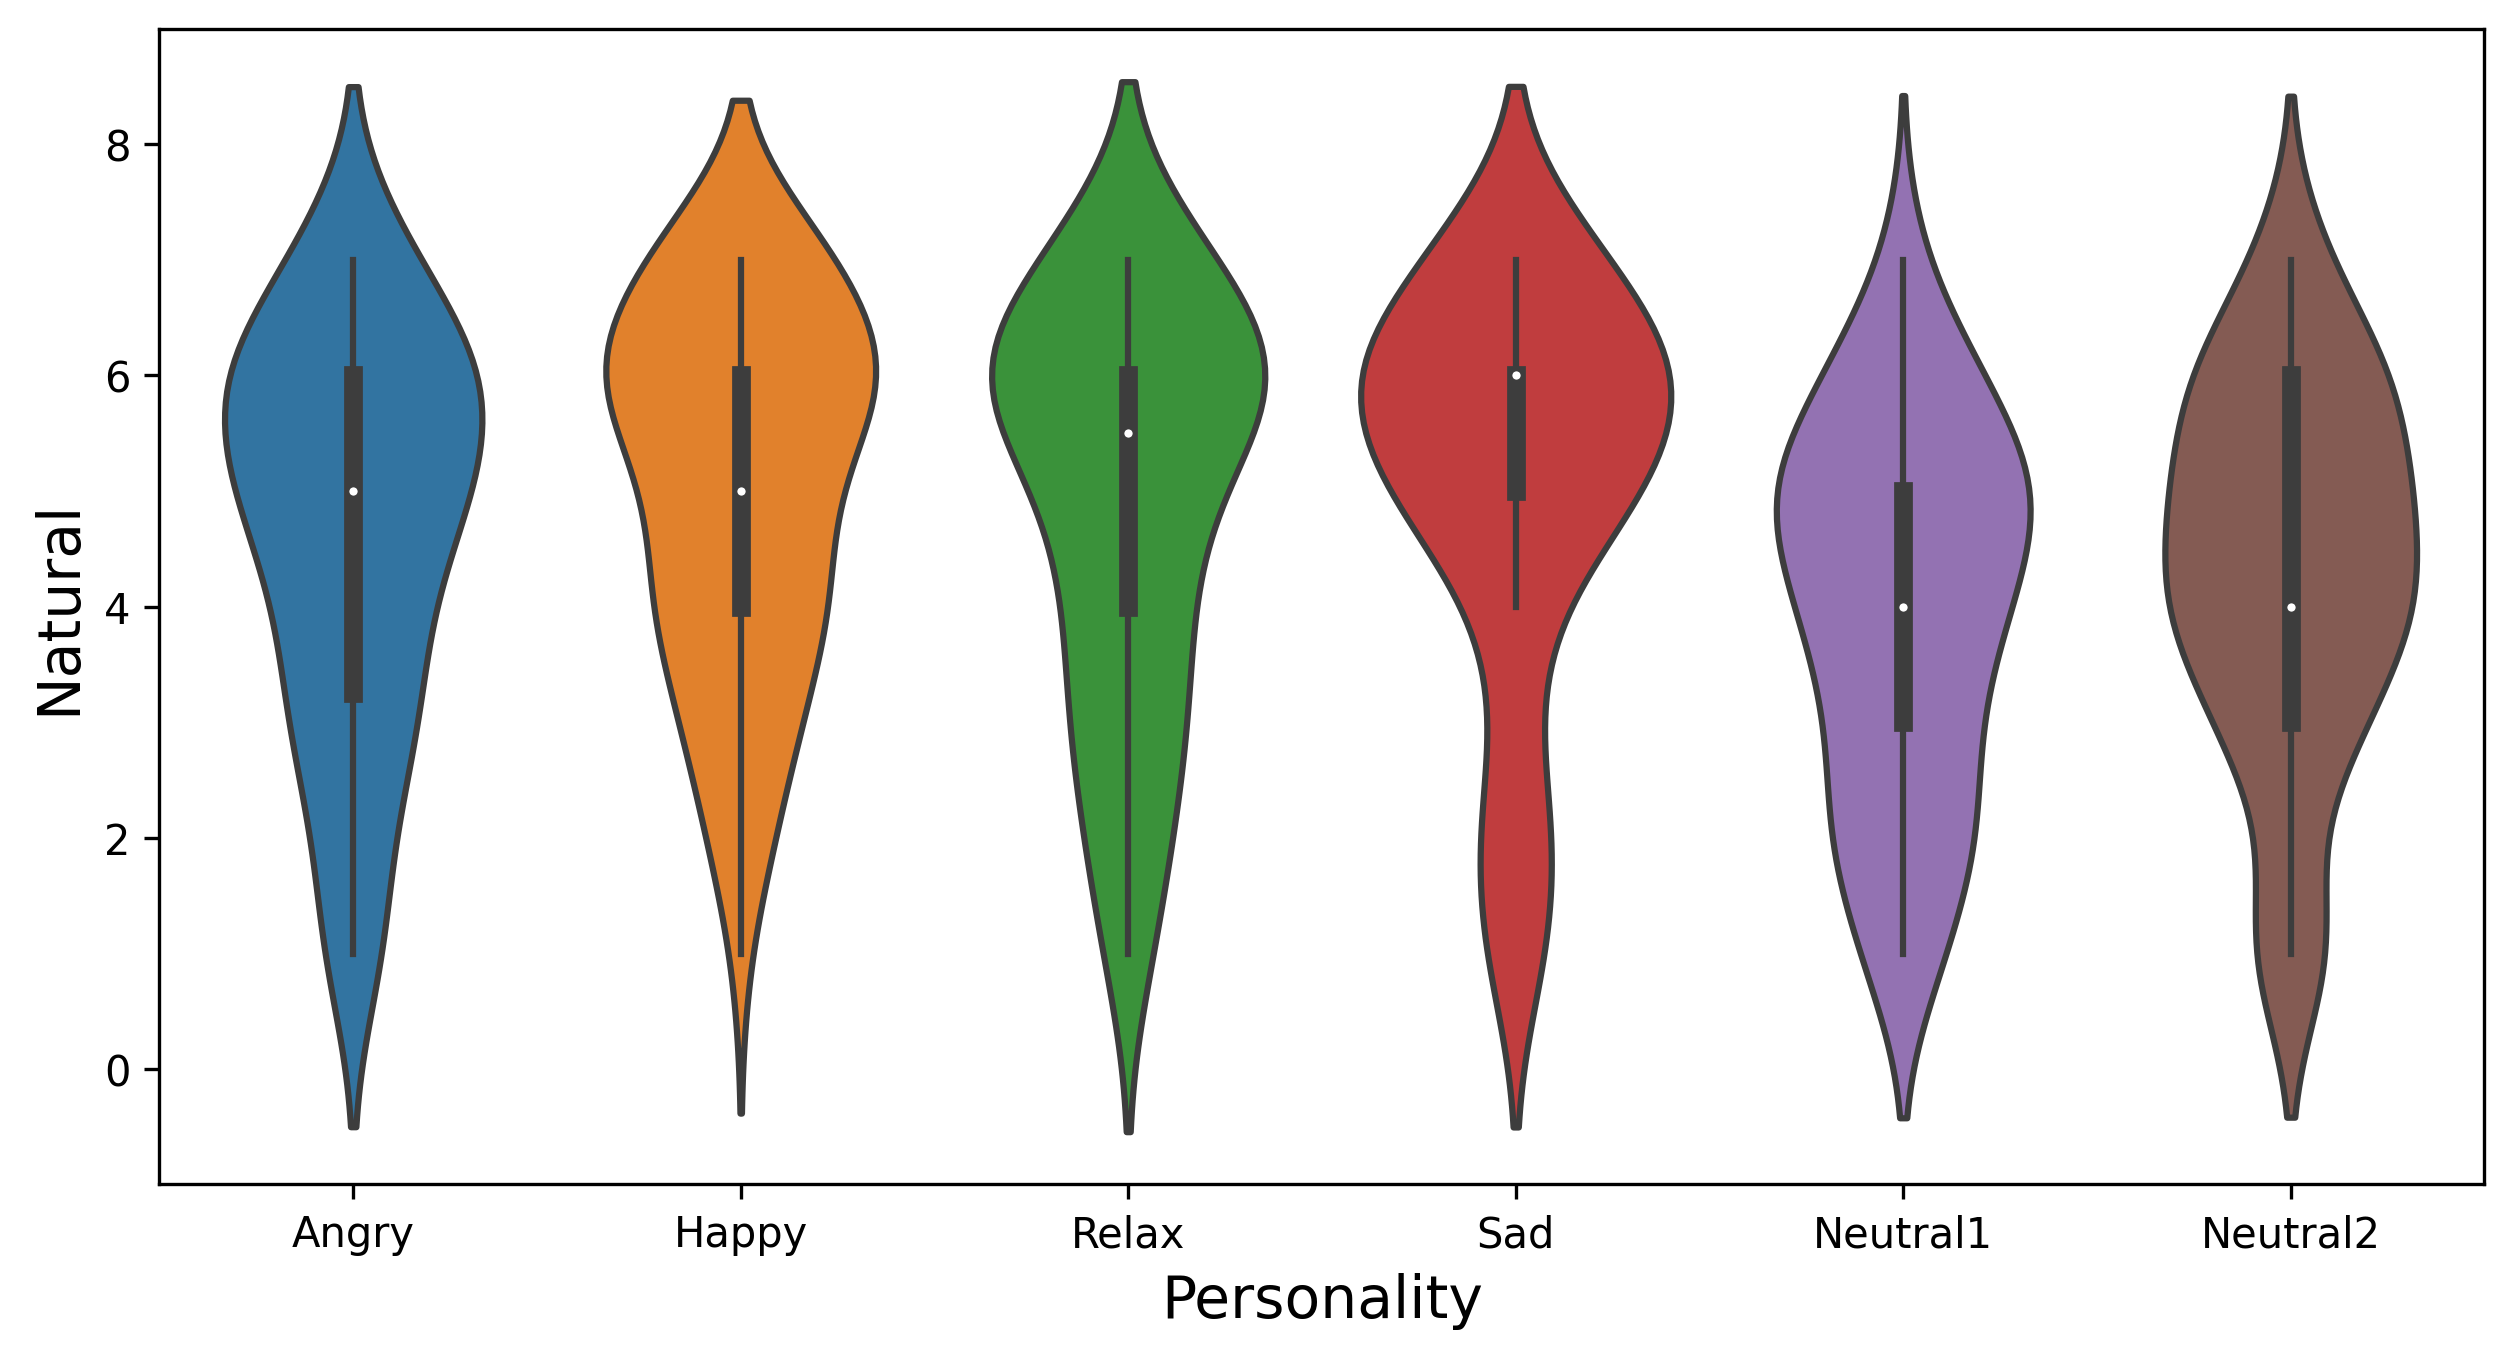

P-value nan with significance ***


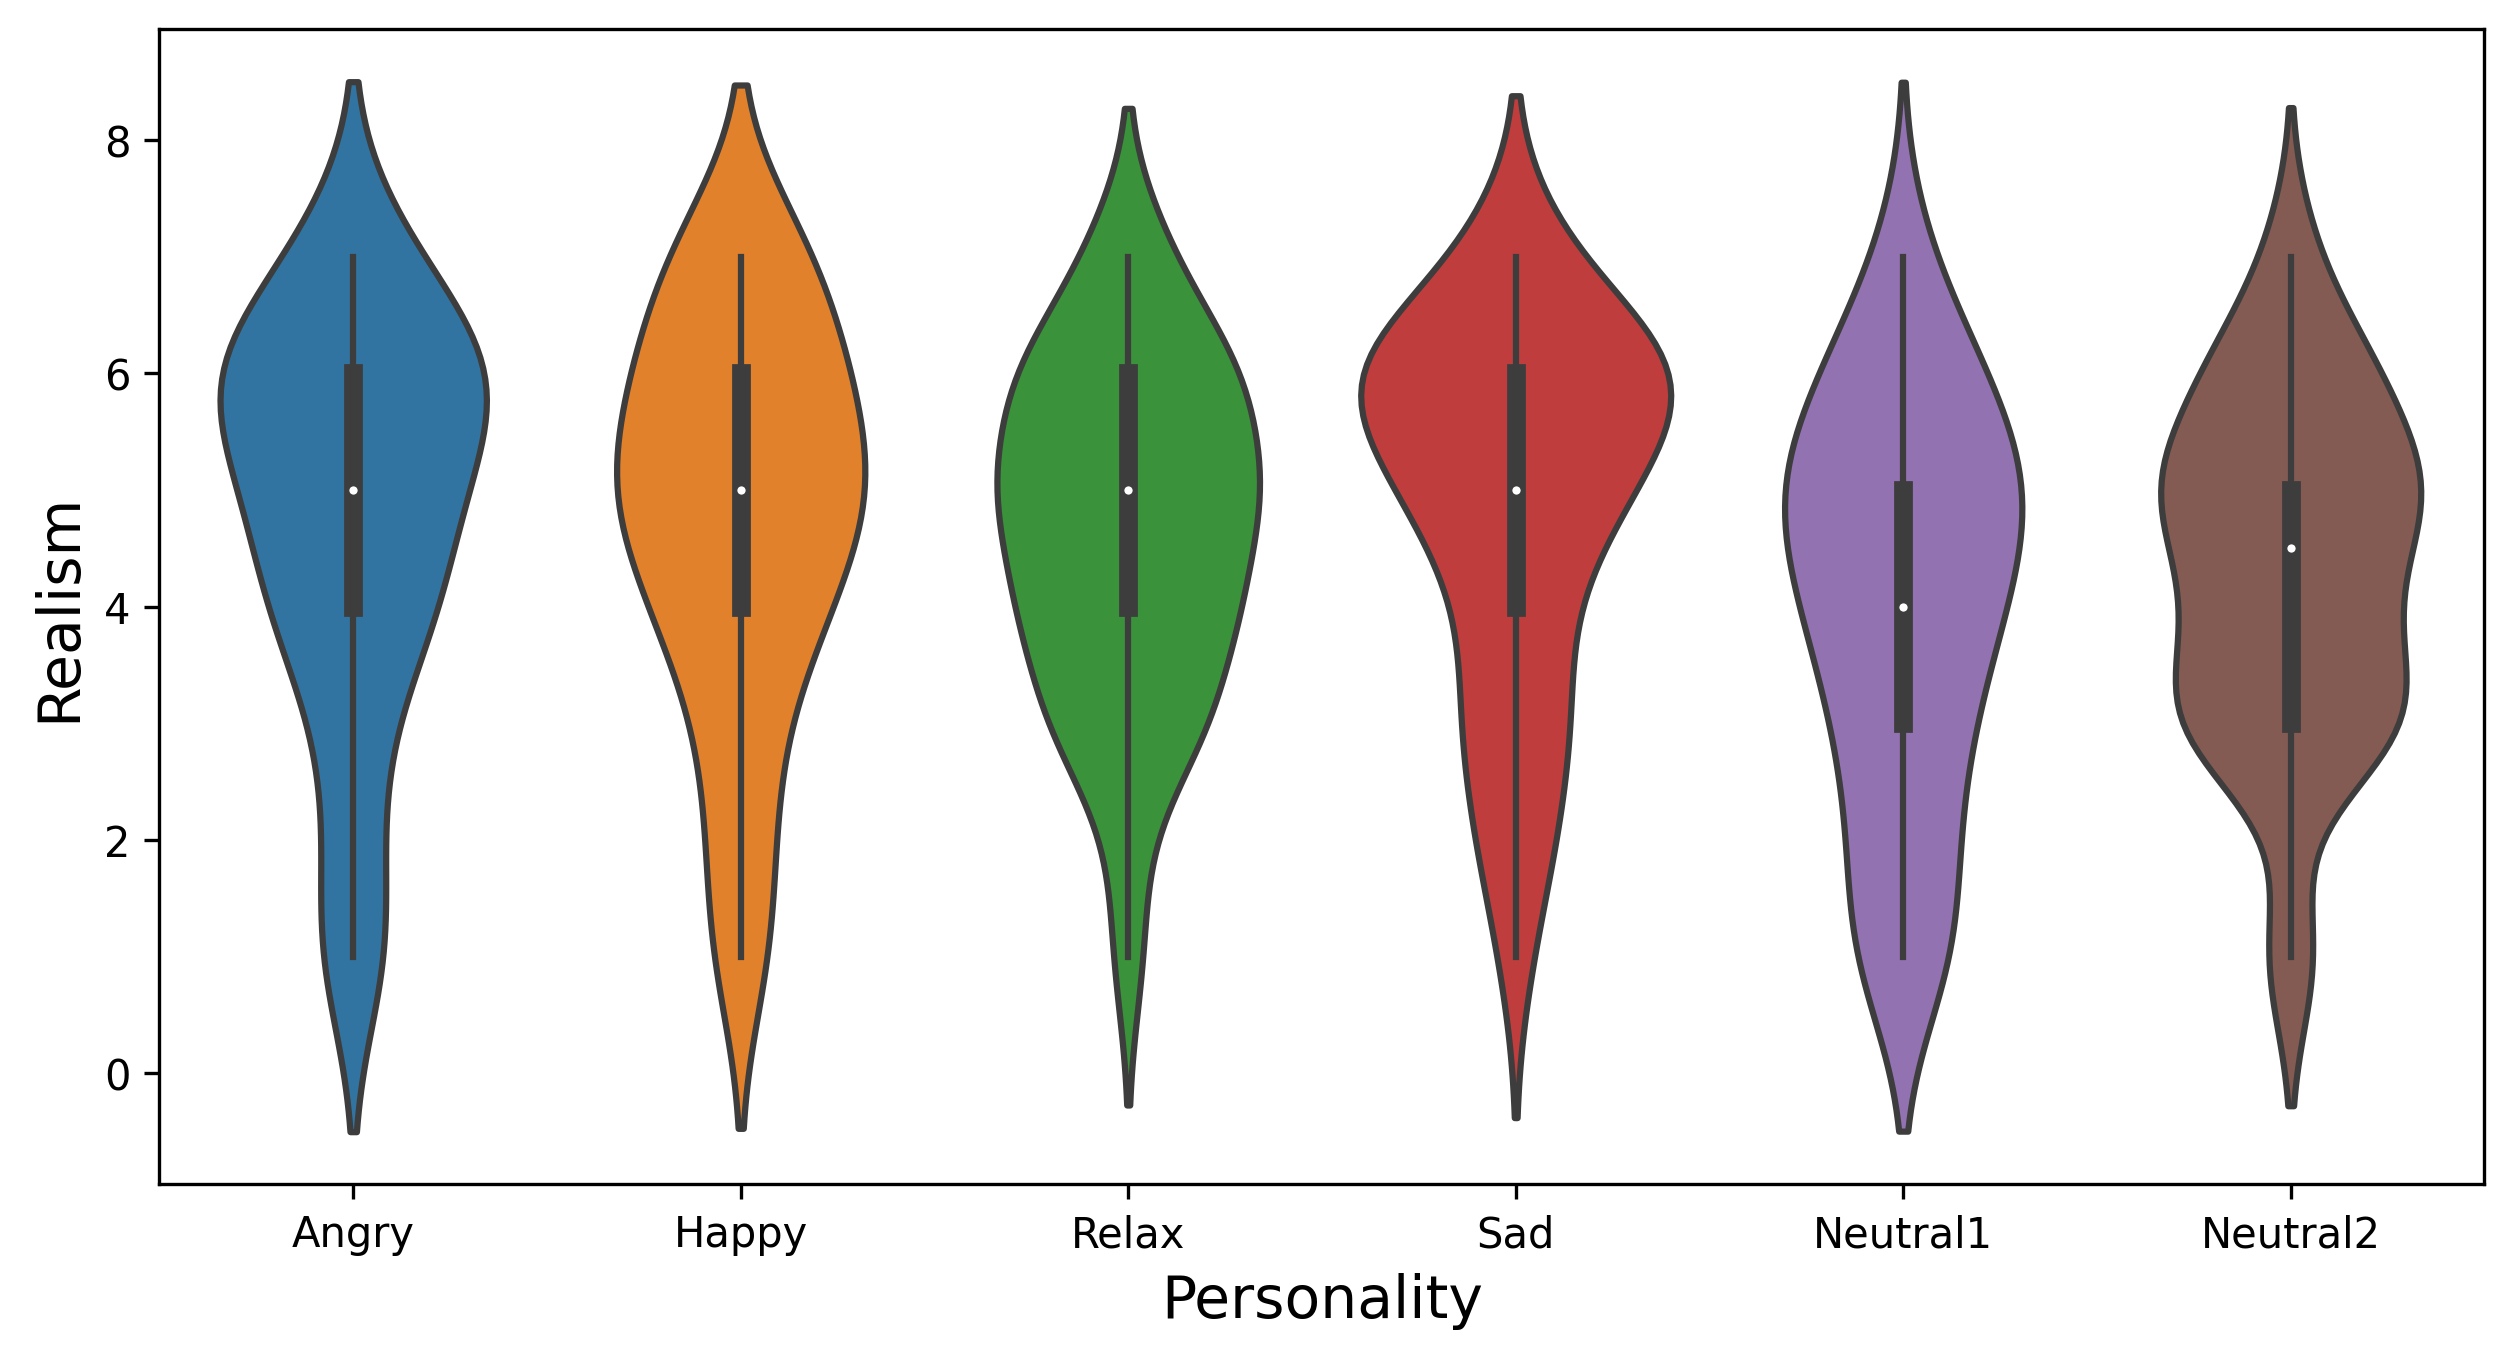

In [43]:
aute.make_binary_plot(data=df_all_cuest, 
                      x_feat="Personality", x_name="Personality", 
                      y_feat="Question1", y_name="Natural", 
                      violin_plot=True)

aute.make_binary_plot(data=df_all_cuest, 
                      x_feat="Personality", x_name="Personality", 
                      y_feat="Question2", y_name="Realism", 
                      violin_plot=True)

# Quizá deberia combinar ambos plots, donde por cada personalidad hay dos boxplots, uno de realismo y otro de naturalidad. 

### Naturalism and Realism as Time evolution

In [44]:
time_evol_nr_list = []
for subj in subj_no_depress_list:
    
    path_to_got = "../Conversations/" + subj + "_Conversations/GuideOfTimes.csv"
    
    try:
        df_got = pd.read_csv(path_to_got, sep=";")
    except:
        print("Bad subject", path_to_got)
        continue
        
    order_of_the_emotions = ["Neutral1", "Neutral2"]
    order_of_the_emotions += [v.split("_")[0] for v in df_got["Event"].values if "_start" in v and "Neutral" not in v]
    
    for i_e, emot in enumerate(order_of_the_emotions):
        
        if i_e+1 > 6:
            continue
        
        cond_subj = df_all_cuest["Usuario"] == subj
        cond_emot = df_all_cuest["Personality"] == emot
        
        if df_all_cuest[cond_subj & cond_emot].shape[0] == 0:
            natural = np.nan
            realism = np.nan
        else:
            natural = df_all_cuest[cond_subj & cond_emot]["Question1"].values[0]
            realism = df_all_cuest[cond_subj & cond_emot]["Question2"].values[0]
        
        time_evol_nr_list.append({
            "Subject": subj,
            "VH Order": str(i_e+1),
            "Personality": emot,
            "Score": natural,
            "Question": "Naturality"
        })
        
        time_evol_nr_list.append({
            "Subject": subj,
            "VH Order": str(i_e+1),
            "Personality": emot,
            "Score": realism,
            "Question": "Realism"
        })

Bad subject ../Conversations/USER_48_CB2_Conversations/GuideOfTimes.csv
Bad subject ../Conversations/USER_47_CB2_Conversations/GuideOfTimes.csv
Bad subject ../Conversations/USER_02_CB_Conversations/GuideOfTimes.csv


In [45]:
df_te_nr = pd.DataFrame(time_evol_nr_list)

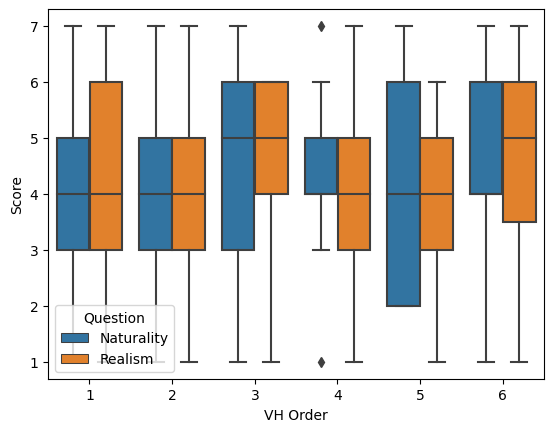

1
Mean Naturality = 3.9091 +/- 1.6763 ; Median = 4.0 ; Min. =  1.0 ; Max. =  7.0
Mean Realism = 4.2727 +/- 1.8631 ; Median = 4.0 ; Min. =  1.0 ; Max. =  7.0

2
Mean Naturality = 4.3077 +/- 1.5385 ; Median = 4.0 ; Min. =  1.0 ; Max. =  7.0
Mean Realism = 4.2308 +/- 1.4756 ; Median = 4.0 ; Min. =  1.0 ; Max. =  7.0

3
Mean Naturality = 4.3846 +/- 1.6888 ; Median = 5.0 ; Min. =  1.0 ; Max. =  7.0
Mean Realism = 4.4615 +/- 1.5988 ; Median = 5.0 ; Min. =  1.0 ; Max. =  6.0

4
Mean Naturality = 4.2308 +/- 1.4226 ; Median = 4.0 ; Min. =  1.0 ; Max. =  7.0
Mean Realism = 4.0769 +/- 1.5914 ; Median = 4.0 ; Min. =  1.0 ; Max. =  7.0

5
Mean Naturality = 4.0909 +/- 1.8807 ; Median = 4.0 ; Min. =  2.0 ; Max. =  7.0
Mean Realism = 4.0 +/- 1.5374 ; Median = 4.0 ; Min. =  1.0 ; Max. =  6.0

6
Mean Naturality = 4.6364 +/- 1.7201 ; Median = 4.0 ; Min. =  1.0 ; Max. =  7.0
Mean Realism = 4.7273 +/- 1.8136 ; Median = 5.0 ; Min. =  1.0 ; Max. =  7.0



In [46]:
# sns.boxplot(data=df_te_nr, x="VH Order", y="Naturality")
order_list = ["1", "2", "3", "4", "5", "6"]
sns.boxplot(x="VH Order", y="Score", hue="Question", data=df_te_nr, order=order_list)
plt.savefig("Results/Images/TimeEvolutionNatRe.pdf", dpi=300, format="pdf")
plt.show()

for k, df_k in df_te_nr.groupby("VH Order"):
    print(k)
    aute.stat_print(df_k[df_k["Question"] == "Naturality"]["Score"], "Naturality")
    aute.stat_print(df_k[df_k["Question"] == "Realism"]["Score"], "Realism")
    print()

NATURALITY


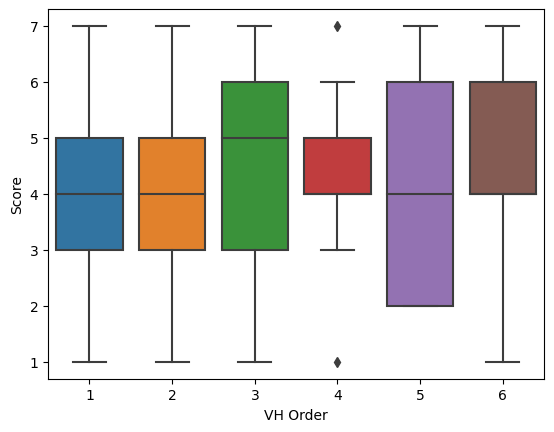

p-Value 0.9467107400810335 in string -


group1,group2,stat,pval,pval_corr,reject
1,2,-0.5811,0.5671,1.0,False
1,3,-0.6603,0.5159,1.0,False
1,4,-0.4869,0.6311,1.0,False
1,5,-0.2282,0.8218,1.0,False
1,6,-0.9576,0.3497,1.0,False
2,3,-0.1166,0.9081,1.0,False
2,4,0.1272,0.8999,1.0,False
2,5,0.2973,0.769,1.0,False
2,6,-0.4729,0.6409,1.0,False
3,4,0.2414,0.8113,1.0,False


REALISM


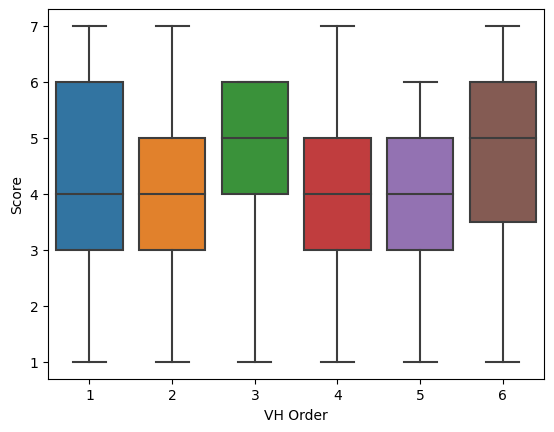

p-Value 0.9255761721604845 in string -


group1,group2,stat,pval,pval_corr,reject
1,2,0.0589,0.9536,1.0,False
1,3,-0.2558,0.8005,1.0,False
1,4,0.2659,0.7928,1.0,False
1,5,0.357,0.7248,1.0,False
1,6,-0.5528,0.5865,1.0,False
2,3,-0.3674,0.7165,1.0,False
2,4,0.2456,0.8081,1.0,False
2,5,0.3585,0.7234,1.0,False
2,6,-0.7079,0.4865,1.0,False
3,4,0.5906,0.5603,1.0,False


In [47]:
# ##################
# ### NATURALITY ###
# ##################

print("NATURALITY")

df_naturality = df_te_nr[df_te_nr["Question"] == "Naturality"]

idx_to_keep = df_naturality[['Score', 'VH Order']].dropna().index

sns.boxplot(data=df_naturality, x="VH Order", y="Score")

plt.show()

group_list = [df_g["Score"].dropna().tolist() for g, df_g in df_naturality.loc[idx_to_keep].groupby("VH Order")]
_, pvalue = sp.stats.f_oneway(*group_list)
print("p-Value", pvalue, "in string", aute.get_p_string(pvalue))

comp = mc.MultiComparison(
    df_naturality.loc[idx_to_keep, 'Score'], df_naturality.loc[idx_to_keep, 'VH Order']
)
tbl, a1, a2 = comp.allpairtest(sp.stats.ttest_ind, method= "bonf")

display(tbl)

# ##################
# ### REALISM ###
# ##################

print("REALISM")

df_realism = df_te_nr[df_te_nr["Question"] == "Realism"]

idx_to_keep = df_realism[['Score', 'VH Order']].dropna().index

sns.boxplot(data=df_realism, x="VH Order", y="Score")

plt.show()

group_list = [df_g["Score"].dropna().tolist() for g, df_g in df_realism.loc[idx_to_keep].groupby("VH Order")]
_, pvalue = sp.stats.f_oneway(*group_list)
print("p-Value", pvalue, "in string", aute.get_p_string(pvalue))

comp = mc.MultiComparison(
    df_realism.loc[idx_to_keep, 'Score'], df_realism.loc[idx_to_keep, 'VH Order']
)
tbl, a1, a2 = comp.allpairtest(sp.stats.ttest_ind, method= "bonf")

display(tbl)

In [91]:
all_subj_in_vhor_last = df_naturality[df_naturality["VH Order"] == "6"].dropna()["Subject"].values

all_bad_idx_list = []
for k, df_k in df_naturality.groupby("VH Order"):
    all_bad_idx_list += [k_idx for k_idx, subj in df_k["Subject"].to_dict().items() if subj not in all_subj_in_vhor_last]
df_naturality_anovarm = df_naturality.drop(index=all_bad_idx_list).reset_index(drop=True)

df_naturality_anovarm["VHOrder"] = df_naturality_anovarm["VH Order"]

anova_rm = AnovaRM(df_naturality_anovarm[df_naturality_anovarm["Question"] == "Naturality"], 
                   "Score", "Subject", within=["VHOrder"])
res = anova_rm.fit()
print(res)

                Anova
        F Value Num DF  Den DF Pr > F
-------------------------------------
VHOrder  0.5359 5.0000 50.0000 0.7480



In [93]:
all_subj_in_vhor_last = df_realism[df_realism["VH Order"] == "6"].dropna()["Subject"].values

all_bad_idx_list = []
for k, df_k in df_realism.groupby("VH Order"):
    all_bad_idx_list += [k_idx for k_idx, subj in df_k["Subject"].to_dict().items() if subj not in all_subj_in_vhor_last]
df_realism_anovarm = df_realism.drop(index=all_bad_idx_list).reset_index(drop=True)

df_realism_anovarm["VHOrder"] = df_realism_anovarm["VH Order"]

anova_rm = AnovaRM(df_realism_anovarm[df_realism_anovarm["Question"] == "Realism"], 
                   "Score", "Subject", within=["VHOrder"])
res = anova_rm.fit()
print(res)

                Anova
        F Value Num DF  Den DF Pr > F
-------------------------------------
VHOrder  0.6824 5.0000 50.0000 0.6389



## SAM Cuest

### Taking the questions directly

Questions 3 and 4

In [81]:
def rescale_feature(array, min_sc=-4, max_sc=4):
    num = max_sc * ( array-np.min(array) ) + min_sc * ( np.max(array) - array)
    den = np.max(array)-np.min(array)
    return num/den

In [31]:
print("Shape", df_happy.shape)

Shape (64, 35)


In [38]:
df_all_cuest["NewPersonality"].unique()

array(['Angry', 'Happy', 'Relax', 'Sad', 'Neutral'], dtype=object)

In [55]:
personality_list

NameError: name 'personality_list' is not defined

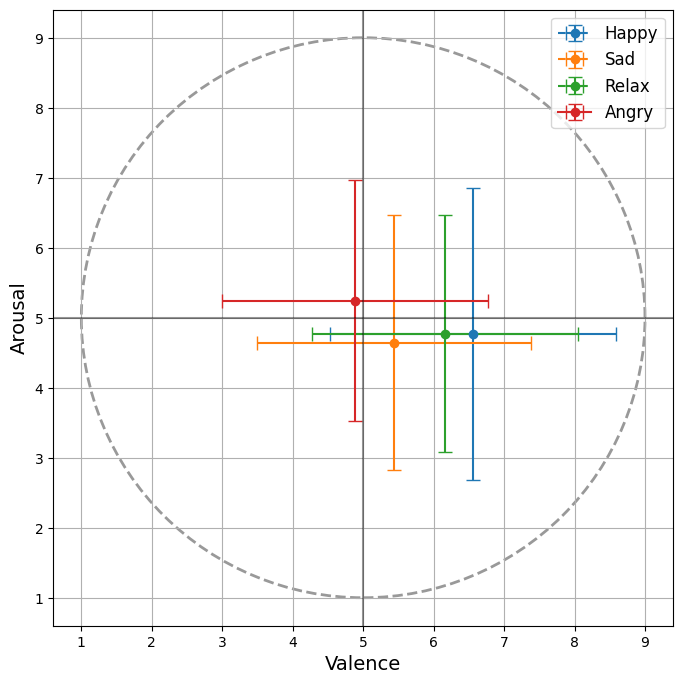

Mean Angry Valence = 4.8871 +/- 1.876 ; Median = 5.0 ; Min. =  1 ; Max. =  9
p-value 0.42061872992674865 in string -
Mean Angry Arousal = 5.2419 +/- 1.7104 ; Median = 5.0 ; Min. =  1 ; Max. =  8
p-value 0.07467393687432355 in string -

Mean Happy Valence = 6.5625 +/- 2.0146 ; Median = 7.0 ; Min. =  1 ; Max. =  9
p-value 0.017342118245124223 in string *
Mean Happy Arousal = 4.7656 +/- 2.0672 ; Median = 5.0 ; Min. =  1 ; Max. =  9
p-value 0.1531620187944415 in string -

Mean Sad Valence = 5.4375 +/- 1.9355 ; Median = 5.0 ; Min. =  2 ; Max. =  9
p-value 0.13516079892546562 in string -
Mean Sad Arousal = 4.6406 +/- 1.806 ; Median = 5.0 ; Min. =  1 ; Max. =  8
p-value 0.0836702960622438 in string -

Mean Relax Valence = 6.1613 +/- 1.8768 ; Median = 6.5 ; Min. =  2.0 ; Max. =  9.0
p-value 0.16514158626760453 in string -
Mean Relax Arousal = 4.7742 +/- 1.6793 ; Median = 5.0 ; Min. =  1.0 ; Max. =  8.0
p-value 0.3062465026891643 in string -



KeyError: 'NewPersonality'

In [56]:
# #######################
# ### SAM for Subject ###
# #######################

circle2 = plt.Circle((5, 5), 4, color='black', fill=False, linewidth=2, alpha=0.4, linestyle="--")

fig, ax = plt.subplots(figsize=(8, 8)) # note we must use plt.subplots, not plt.subplot
# (or if you have an existing figure)
# fig = plt.gcf()
# ax = fig.gca()

plt.errorbar((df_happy["Question3"]).mean(), 
             (df_happy["Question4"].astype(np.int16)).mean(), 
             xerr=(df_happy["Question3"]).std(), 
             yerr=(df_happy["Question4"].astype(np.int16)).std(), 
             marker='o', capsize=5, linestyle="--", label="Happy")

plt.errorbar((df_sad["Question3"]).mean(), 
             (df_sad["Question4"]).mean(), 
             xerr=(df_sad["Question3"]).std(), 
             yerr=(df_sad["Question4"]).std(),
             marker='o', capsize=5, linestyle="--", label="Sad")

plt.errorbar((df_relax["Question3"]).mean(), 
             (df_relax["Question4"]).mean(), 
             xerr=(df_relax["Question3"]).std(), 
             yerr=(df_relax["Question4"]).std(), 
             marker='o', capsize=5, linestyle="--", label="Relax")

plt.errorbar((df_angry["Question3"]).mean(), 
             (df_angry["Question4"].astype(np.int16)).mean(), 
             xerr=(df_angry["Question3"]).std(), 
             yerr=(df_angry["Question4"].astype(np.int16)).std(),
             marker='o', capsize=5, label="Angry")

ax.add_patch(circle2)

plt.axvline(5, c="black", alpha=0.4)
plt.axhline(5, c="black", alpha=0.4)
plt.grid()

plt.legend(fontsize=12)
plt.xlabel("Valence", fontsize=14)
plt.ylabel("Arousal", fontsize=14)

plt.savefig("Results/Images/SAMSubject.pdf", dpi=300, format="pdf")
plt.show()

aute.stat_print(df_angry["Question3"], "Angry Valence")
_, p_value = sp.stats.normaltest(df_angry["Question3"].dropna())
print("p-value", p_value, "in string", aute.get_p_string(p_value))

aute.stat_print(df_angry["Question4"], "Angry Arousal")
_, p_value = sp.stats.normaltest(df_angry["Question4"].dropna())
print("p-value", p_value, "in string", aute.get_p_string(p_value))

print()
aute.stat_print(df_happy["Question3"], "Happy Valence")
_, p_value = sp.stats.normaltest(df_happy["Question3"].dropna())
print("p-value", p_value, "in string", aute.get_p_string(p_value))

aute.stat_print(df_happy["Question4"], "Happy Arousal")
_, p_value = sp.stats.normaltest(df_happy["Question4"].dropna())
print("p-value", p_value, "in string", aute.get_p_string(p_value))

print()
aute.stat_print(df_sad["Question3"], "Sad Valence")
_, p_value = sp.stats.normaltest(df_sad["Question3"].dropna())
print("p-value", p_value, "in string", aute.get_p_string(p_value))

aute.stat_print(df_sad["Question4"], "Sad Arousal")
_, p_value = sp.stats.normaltest(df_sad["Question4"].dropna())
print("p-value", p_value, "in string", aute.get_p_string(p_value))

print()
aute.stat_print(df_relax["Question3"], "Relax Valence")
_, p_value = sp.stats.normaltest(df_relax["Question3"].dropna())
print("p-value", p_value, "in string", aute.get_p_string(p_value))

aute.stat_print(df_relax["Question4"], "Relax Arousal")
_, p_value = sp.stats.normaltest(df_relax["Question4"].dropna())
print("p-value", p_value, "in string", aute.get_p_string(p_value))

print()

personality_list = ["Angry", "Happy", "Sad", "Relax"]

group_list = [
    df_g["Question3"].dropna().tolist() for g, df_g in df_all_cuest.groupby("NewPersonality") if g != "Neutral"
]
_, pvalue = sp.stats.f_oneway(*group_list)
print("Valence", pvalue, "string", aute.get_p_string(pvalue))

group_list = [
    df_g["Question4"].dropna().tolist() for g, df_g in df_all_cuest.groupby("NewPersonality") if g != "Neutral"
]
_, pvalue = sp.stats.f_oneway(*group_list)
print("Arousal", pvalue, "string", aute.get_p_string(pvalue))

results_subject_list = []
for i_p1, p1 in enumerate(personality_list[:-1]):
    for p2 in personality_list[(i_p1+1):]:
        # print("Personality", p1, p2)
        
        x1 = (df_all_cuest[df_all_cuest["Personality"] == p1]["Question3"]).dropna()
        x2 = (df_all_cuest[df_all_cuest["Personality"] == p2]["Question3"]).dropna()
        
        _, p_value_valencia = sp.stats.ttest_ind(x1, x2)
        
        x1 = (df_all_cuest[df_all_cuest["Personality"] == p1]["Question4"]).dropna().astype(np.int16)
        x2 = (df_all_cuest[df_all_cuest["Personality"] == p2]["Question4"]).dropna().astype(np.int16)
        
        _, p_value_arousal = sp.stats.ttest_ind(x1, x2)
        
        results_subject_list.append({
            "Personality 1": p1,
            "Personality 2": p2,
            "NumSamples": len(x1),
            "Valencia p-value": p_value_valencia,
            "Valencia p-value sig": aute.get_p_string(p_value_valencia),
            "Arousal p-value": p_value_arousal,
            "Arousal p-value sig": aute.get_p_string(p_value_arousal),
        })
        
display(pd.DataFrame(results_subject_list))

### For reviewers

In [58]:
df_av_save_list = []
for pers, df_pers in df_all_cuest.groupby("Personality"):
    df_av_save_list.append(df_pers[["Question3", "Question4", "SubjectId", "Personality"]])

df_av = pd.concat(df_av_save_list).reset_index(drop=True)

In [61]:
df_av

,Question3,Question4,SubjectId,Personality
0,6.0,6.0,USER_48_CB2,Angry
1,7.0,1.0,USER_47_CB2,Angry
2,7.0,7.0,USER_45_CB2,Angry
3,5.0,5.0,USER_43_CB2,Angry
4,4.0,6.0,USER_42_CB2,Angry
...,...,...,...,...
374,8.0,2.0,USER_07_CB,Sad
375,5.0,3.0,USER_05_CB,Sad
376,4.0,7.0,USER_03_CB,Sad
377,5.0,5.0,USER_02_CB,Sad


In [76]:
personality_list = ["Angry", "Happy", "Sad", "Relax"]

df_av_filter_list = []
for subj, df_subj in df_av.groupby("SubjectId"):

    df_subj_nona = df_subj.dropna()
    
    counter = 0
    for state in personality_list:
        if state in df_subj_nona["Personality"].values:
            counter += 1

    if counter != 4:
        continue
    
    for state in personality_list:
        df_av_filter_list.append(dict(zip(df_subj_nona.columns, df_subj_nona[df_subj_nona["Personality"] == state].values[0])))

df_av_filter = pd.DataFrame(df_av_filter_list)
display(df_av_filter)

results_subject_list = []
for i_s, state_i in enumerate(personality_list[:-1]):
    for state_j in personality_list[(i_s+1):]:
        
        x1 = (df_av_filter[df_av_filter["Personality"] == state_i]["Question3"])
        x2 = (df_av_filter[df_av_filter["Personality"] == state_j]["Question3"])
        
        _, p_value_valencia = sp.stats.ttest_rel(x1, x2)
        
        x1 = (df_av_filter[df_av_filter["Personality"] == state_i]["Question4"]).astype(np.int16)
        x2 = (df_av_filter[df_av_filter["Personality"] == state_j]["Question4"]).astype(np.int16)
        
        _, p_value_arousal = sp.stats.ttest_rel(x1, x2)
        
        results_subject_list.append({
            "Personality 1": state_i,
            "Personality 2": state_j,
            "NumSamples": len(x1),
            "Valencia p-value": p_value_valencia,
            "Valencia p-value sig": aute.get_p_string(p_value_valencia),
            "Arousal p-value": p_value_arousal,
            "Arousal p-value sig": aute.get_p_string(p_value_arousal),
        })
        
display(pd.DataFrame(results_subject_list))

,Question3,Question4,SubjectId,Personality
0,7.0,6.0,USER_01_CB,Angry
1,7.0,6.0,USER_01_CB,Happy
2,5.0,5.0,USER_01_CB,Sad
3,7.0,6.0,USER_01_CB,Relax
4,3.0,5.0,USER_01_CB2,Angry
...,...,...,...,...
243,5.0,3.0,USER_51_CB,Relax
244,5.0,6.0,USER_52_CB,Angry
245,7.0,5.0,USER_52_CB,Happy
246,5.0,5.0,USER_52_CB,Sad


,Personality 1,Personality 2,NumSamples,Valencia p-value,Valencia p-value sig,Arousal p-value,Arousal p-value sig
0,Angry,Happy,62,9.359737e-07,***,0.070079,-
1,Angry,Sad,62,1.177256e-01,-,0.046477,*
2,Angry,Relax,62,2.370506e-04,***,0.070095,-
3,Happy,Sad,62,1.232280e-05,***,0.889974,-
4,Happy,Relax,62,1.480309e-01,-,0.612712,-
5,Sad,Relax,62,1.209702e-02,*,0.717810,-


In [77]:
df_av_save_list = []
for pers, df_pers in df_all_cuest.groupby("Personality"):
    df_av_save_list.append(df_pers[["Question6", "Question7", "SubjectId", "Personality"]])

df_av = pd.concat(df_av_save_list).reset_index(drop=True)

personality_list = ["Angry", "Happy", "Sad", "Relax"]

df_av_filter_list = []
for subj, df_subj in df_av.groupby("SubjectId"):

    df_subj_nona = df_subj.dropna()
    
    counter = 0
    for state in personality_list:
        if state in df_subj_nona["Personality"].values:
            counter += 1

    if counter != 4:
        continue
    
    for state in personality_list:
        df_av_filter_list.append(dict(zip(df_subj_nona.columns, df_subj_nona[df_subj_nona["Personality"] == state].values[0])))

df_av_filter = pd.DataFrame(df_av_filter_list)
display(df_av_filter)

results_subject_list = []
for i_s, state_i in enumerate(personality_list[:-1]):
    for state_j in personality_list[(i_s+1):]:
        
        x1 = (df_av_filter[df_av_filter["Personality"] == state_i]["Question6"])
        x2 = (df_av_filter[df_av_filter["Personality"] == state_j]["Question6"])
        
        _, p_value_valencia = sp.stats.ttest_rel(x1, x2)
        
        x1 = (df_av_filter[df_av_filter["Personality"] == state_i]["Question7"]).astype(np.int16)
        x2 = (df_av_filter[df_av_filter["Personality"] == state_j]["Question7"]).astype(np.int16)
        
        _, p_value_arousal = sp.stats.ttest_rel(x1, x2)
        
        results_subject_list.append({
            "Personality 1": state_i,
            "Personality 2": state_j,
            "NumSamples": len(x1),
            "Valencia p-value": p_value_valencia,
            "Valencia p-value sig": aute.get_p_string(p_value_valencia),
            "Arousal p-value": p_value_arousal,
            "Arousal p-value sig": aute.get_p_string(p_value_arousal),
        })
        
display(pd.DataFrame(results_subject_list))

,Question6,Question7,SubjectId,Personality
0,5.0,7.0,USER_01_CB,Angry
1,6.0,5.0,USER_01_CB,Happy
2,5.0,5.0,USER_01_CB,Sad
3,6.0,5.0,USER_01_CB,Relax
4,3.0,9.0,USER_01_CB2,Angry
...,...,...,...,...
243,5.0,7.0,USER_51_CB,Relax
244,5.0,5.0,USER_52_CB,Angry
245,7.0,5.0,USER_52_CB,Happy
246,5.0,5.0,USER_52_CB,Sad


,Personality 1,Personality 2,NumSamples,Valencia p-value,Valencia p-value sig,Arousal p-value,Arousal p-value sig
0,Angry,Happy,62,3.833351e-08,***,6.391735e-04,***
1,Angry,Sad,62,2.666062e-01,-,1.703615e-03,**
2,Angry,Relax,62,1.119613e-05,***,4.284706e-08,***
3,Happy,Sad,62,3.658336e-06,***,4.925345e-01,-
4,Happy,Relax,62,1.187484e-01,-,2.109621e-03,**
5,Sad,Relax,62,6.645990e-04,***,4.235145e-03,**


In [90]:
df_help = pd.concat([df_angry, df_happy, df_sad, df_relax], axis=0).reset_index(drop=True)

good_idx = df_help['Question3'].dropna().index

one_tukey_smm = smm.pairwise_tukeyhsd(df_help['Question3'].loc[good_idx], df_help['Personality'].loc[good_idx], alpha=0.05)
print(one_tukey_smm)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
 Angry  Happy   1.6754    0.0  0.7799  2.5709   True
 Angry  Relax   1.2742 0.0018  0.3716  2.1767   True
 Angry    Sad   0.5504 0.3863 -0.3451  1.4459  False
 Happy  Relax  -0.4012 0.6533 -1.2967  0.4943  False
 Happy    Sad   -1.125 0.0066 -2.0133 -0.2367   True
 Relax    Sad  -0.7238  0.159 -1.6193  0.1717  False
----------------------------------------------------


In [89]:
df_help = pd.concat([df_angry, df_happy, df_sad, df_relax], axis=0).reset_index(drop=True)

good_idx = df_help['Question4'].dropna().index

one_tukey_smm = smm.pairwise_tukeyhsd(df_help['Question4'].loc[good_idx], df_help['Personality'].loc[good_idx], alpha=0.05)
print(one_tukey_smm)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
 Angry  Happy  -0.4763 0.4672 -1.3238 0.3712  False
 Angry  Relax  -0.4677 0.4903 -1.3219 0.3864  False
 Angry    Sad  -0.6013 0.2593 -1.4488 0.2462  False
 Happy  Relax   0.0086    1.0 -0.8389  0.856  False
 Happy    Sad   -0.125 0.9806 -0.9657 0.7157  False
 Relax    Sad  -0.1336 0.9771  -0.981 0.7139  False
---------------------------------------------------


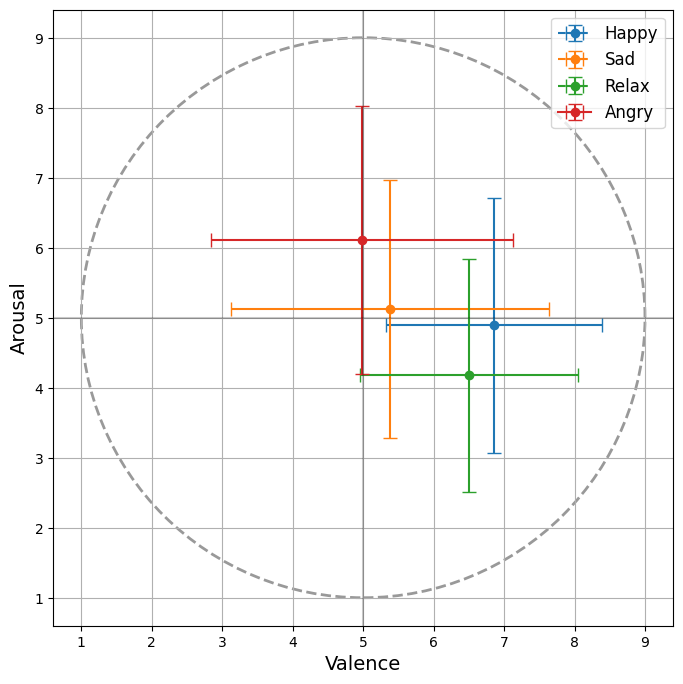

Mean Angry Valence = 4.9839 +/- 2.1288 ; Median = 5.0 ; Min. =  1 ; Max. =  9
p-value 0.32195731777929454 in string -
Mean Angry Arousal = 6.1129 +/- 1.9017 ; Median = 6.0 ; Min. =  1 ; Max. =  9
p-value 0.08812406163125157 in string -

Mean Happy Valence = 6.8594 +/- 1.5193 ; Median = 7.0 ; Min. =  2 ; Max. =  9
p-value 0.1634208161289193 in string -
Mean Happy Arousal = 4.8906 +/- 1.8038 ; Median = 5.0 ; Min. =  1 ; Max. =  8
p-value 0.25304149247153546 in string -

Mean Sad Valence = 5.375 +/- 2.2396 ; Median = 5.0 ; Min. =  1 ; Max. =  9
p-value 0.06418167081913506 in string -
Mean Sad Arousal = 5.125 +/- 1.8243 ; Median = 5.0 ; Min. =  1 ; Max. =  8
p-value 0.17487633186927787 in string -

Mean Relax Valence = 6.5 +/- 1.5319 ; Median = 6.0 ; Min. =  4.0 ; Max. =  9.0
p-value 0.0018662471798201368 in string **
Mean Relax Arousal = 4.1774 +/- 1.6512 ; Median = 5.0 ; Min. =  1.0 ; Max. =  8.0
p-value 0.588326068394229 in string -

Valence 2.0630091563910404e-08 string ***
Arousal 2.0

,Personality 1,Personality 2,NumSamples,Valencia p-value,Valencia p-value sig,Arousal p-value,Arousal p-value sig
0,Angry,Happy,62,9.937076e-08,***,3.550711e-04,***
1,Angry,Sad,62,3.211013e-01,-,3.771991e-03,**
2,Angry,Relax,62,1.471769e-05,***,2.056750e-08,***
3,Happy,Sad,64,2.744450e-05,***,4.697232e-01,-
4,Happy,Relax,64,1.921288e-01,-,2.344183e-02,*
5,Sad,Relax,64,1.462388e-03,**,2.981781e-03,**


In [51]:
circle2 = plt.Circle((5, 5), 4, color='black', fill=False, linewidth=2, alpha=0.4, linestyle="--")

fig, ax = plt.subplots(figsize=(8, 8)) # note we must use plt.subplots, not plt.subplot
# (or if you have an existing figure)
# fig = plt.gcf()
# ax = fig.gca()

plt.errorbar((df_happy["Question6"]).mean(), 
             (df_happy["Question7"].astype(np.int16)).mean(), 
             xerr=(df_happy["Question6"]).std(), 
             yerr=(df_happy["Question7"].astype(np.int16)).std(), 
             marker='o', capsize=5, linestyle="--", label="Happy")

plt.errorbar((df_sad["Question6"]).mean(), 
             (df_sad["Question7"].astype(np.int16)).mean(), 
             xerr=(df_sad["Question6"]).std(), 
             yerr=(df_sad["Question7"].astype(np.int16)).std(),
             marker='o', capsize=5, linestyle="--", label="Sad")

plt.errorbar((df_relax["Question6"]).mean(), 
             (df_relax["Question7"]).mean(), 
             xerr=(df_relax["Question6"]).std(), 
             yerr=(df_relax["Question7"]).std(), 
             marker='o', capsize=5, linestyle="--", label="Relax")

plt.errorbar((df_angry["Question6"]).mean(), 
             (df_angry["Question7"].astype(np.int16)).mean(), 
             xerr=(df_angry["Question6"]).std(), 
             yerr=(df_angry["Question7"].astype(np.int16)).std(),
             marker='o', capsize=5, label="Angry")

ax.add_patch(circle2)

plt.axvline(5, c="black", alpha=0.2)
plt.axhline(5, c="black", alpha=0.2)
plt.grid()

plt.legend(fontsize=12)
plt.xlabel("Valence", fontsize=14)
plt.ylabel("Arousal", fontsize=14)

plt.savefig("Results/Images/SAMVH.pdf", dpi=300, format="pdf")
plt.show()

aute.stat_print(df_angry["Question6"], "Angry Valence")
_, p_value = sp.stats.normaltest(df_angry["Question6"].dropna())
print("p-value", p_value, "in string", aute.get_p_string(p_value))

aute.stat_print(df_angry["Question7"], "Angry Arousal")
_, p_value = sp.stats.normaltest(df_angry["Question7"].dropna())
print("p-value", p_value, "in string", aute.get_p_string(p_value))

print()
aute.stat_print(df_happy["Question6"], "Happy Valence")
_, p_value = sp.stats.normaltest(df_happy["Question6"].dropna())
print("p-value", p_value, "in string", aute.get_p_string(p_value))

aute.stat_print(df_happy["Question7"], "Happy Arousal")
_, p_value = sp.stats.normaltest(df_happy["Question7"].dropna())
print("p-value", p_value, "in string", aute.get_p_string(p_value))

print()
aute.stat_print(df_sad["Question6"], "Sad Valence")
_, p_value = sp.stats.normaltest(df_sad["Question6"].dropna())
print("p-value", p_value, "in string", aute.get_p_string(p_value))

aute.stat_print(df_sad["Question7"], "Sad Arousal")
_, p_value = sp.stats.normaltest(df_sad["Question7"].dropna())
print("p-value", p_value, "in string", aute.get_p_string(p_value))

print()
aute.stat_print(df_relax["Question6"], "Relax Valence")
_, p_value = sp.stats.normaltest(df_relax["Question6"].dropna())
print("p-value", p_value, "in string", aute.get_p_string(p_value))

aute.stat_print(df_relax["Question7"], "Relax Arousal")
_, p_value = sp.stats.normaltest(df_relax["Question7"].dropna())
print("p-value", p_value, "in string", aute.get_p_string(p_value))

print()

personality_list = ["Angry", "Happy", "Sad", "Relax"]

group_list = [
    df_g["Question6"].dropna().tolist() for g, df_g in df_all_cuest.groupby("NewPersonality") if g != "Neutral"
]
_, pvalue = sp.stats.f_oneway(*group_list)
print("Valence", pvalue, "string", aute.get_p_string(pvalue))

group_list = [
    df_g["Question7"].dropna().tolist() for g, df_g in df_all_cuest.groupby("NewPersonality") if g != "Neutral"
]
_, pvalue = sp.stats.f_oneway(*group_list)
print("Arousal", pvalue, "string", aute.get_p_string(pvalue))

results_vh_list = []
for i_p1, p1 in enumerate(personality_list[:-1]):
    for p2 in personality_list[(i_p1+1):]:
        # print("Personality", p1, p2)
        
        x1 = df_all_cuest[df_all_cuest["Personality"] == p1]["Question6"].dropna()
        x2 = df_all_cuest[df_all_cuest["Personality"] == p2]["Question6"].dropna()
        
        _, p_value_valencia = sp.stats.ttest_ind(x1, x2)
        
        x1 = df_all_cuest[df_all_cuest["Personality"] == p1]["Question7"].dropna().astype(np.int16)
        x2 = df_all_cuest[df_all_cuest["Personality"] == p2]["Question7"].dropna().astype(np.int16)
        
        _, p_value_arousal = sp.stats.ttest_ind(x1, x2)
        
        results_vh_list.append({
            "Personality 1": p1,
            "Personality 2": p2,
            "NumSamples": len(x1),
            "Valencia p-value": p_value_valencia,
            "Valencia p-value sig": aute.get_p_string(p_value_valencia),
            "Arousal p-value": p_value_arousal,
            "Arousal p-value sig": aute.get_p_string(p_value_arousal),
        })
        
pd.DataFrame(results_vh_list)

In [85]:
df_help = pd.concat([df_angry, df_happy, df_sad, df_relax], axis=0).reset_index(drop=True)

good_idx = df_help['Question6'].dropna().index

one_tukey_smm = smm.pairwise_tukeyhsd(df_help['Question6'].loc[good_idx], df_help['Personality'].loc[good_idx], alpha=0.05)
print(one_tukey_smm)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
 Angry  Happy   1.8755    0.0  0.9998  2.7512   True
 Angry  Relax   1.5161 0.0001  0.6335  2.3988   True
 Angry    Sad   0.3911 0.6556 -0.4846  1.2668  False
 Happy  Relax  -0.3594 0.7133 -1.2351  0.5163  False
 Happy    Sad  -1.4844 0.0001 -2.3531 -0.6157   True
 Relax    Sad   -1.125 0.0056 -2.0007 -0.2493   True
----------------------------------------------------


In [87]:
df_help = pd.concat([df_angry, df_happy, df_sad, df_relax], axis=0).reset_index(drop=True)

good_idx = df_help['Question7'].dropna().index

one_tukey_smm = smm.pairwise_tukeyhsd(df_help['Question7'].loc[good_idx], df_help['Personality'].loc[good_idx], alpha=0.05)
print(one_tukey_smm)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
 Angry  Happy  -1.2223 0.0011 -2.0576  -0.387   True
 Angry  Relax  -1.9355    0.0 -2.7774 -1.0936   True
 Angry    Sad  -0.9879 0.0131 -1.8232 -0.1526   True
 Happy  Relax  -0.7132 0.1237 -1.5485  0.1221  False
 Happy    Sad   0.2344 0.8843 -0.5943   1.063  False
 Relax    Sad   0.9476  0.019  0.1123  1.7829   True
----------------------------------------------------


In [58]:
group_list = [
    df_angry["Question7"].dropna().values, df_happy["Question7"].dropna().values, 
    df_sad["Question7"].dropna().values, df_relax["Question7"].dropna().values
]
post_hoc.posthoc_ttest(group_list, p_adjust = 'bonferroni')

,1,2,3,4
1,1.000000e+00,0.002130,0.022632,1.234050e-07
2,2.130426e-03,1.000000,1.000000,1.406510e-01
3,2.263195e-02,1.000000,1.000000,1.789069e-02
4,1.234050e-07,0.140651,0.017891,1.000000e+00


### Final questions VAS Cuest

In [66]:
features_to_change_subject = [
    # 'Disgusto', 
    'Felicidad', 
    'Enfado', 
    # 'Miedo', 
    'Relajado',
    # 'Sorpresa', 
    'Tristeza'
]

features_to_change_avatar = [
    # 'Disgusto.1', 
    'Felicidad.1', 
    'Enfado.1',
    # 'Miedo.1', 
    'Relajado.1', 
    # 'Sorpresa.1', 
    'Tristeza.1'
]

dict_to_translate = {
    'Disgusto': "Displeasure", 
    'Felicidad': "Happiness", 
    'Enfado': "Anger", 
    'Miedo': "Fear", 
    'Relajado': "Relaxed",
    'Sorpresa': "Surprise", 
    'Tristeza': "Sadness"
}

def achieve_vas_boxplot(data):
    state_vas_plot_list = []
    for i in range(data.shape[0]):
        if "User" in data["Usuario"].iloc[i]:
            for feat in features_to_change_subject:
                state_vas_plot_list.append({
                    "User": data["Usuario"].iloc[i],
                    "State": feat,
                    "Value": data[feat].iloc[i],
                    "Score": dict_to_translate[feat],
                    "Agent": "Human"
                })

            for feat in features_to_change_avatar:
                new_feat = feat.split(".")[0]
                state_vas_plot_list.append({
                    "User": data["Usuario"].iloc[i],
                    "State": new_feat,
                    "Value": data[feat].iloc[i],
                    "Score": dict_to_translate[feat.split(".")[0]],
                    "Agent": "VH"
                })

    return pd.DataFrame(state_vas_plot_list)

Angry


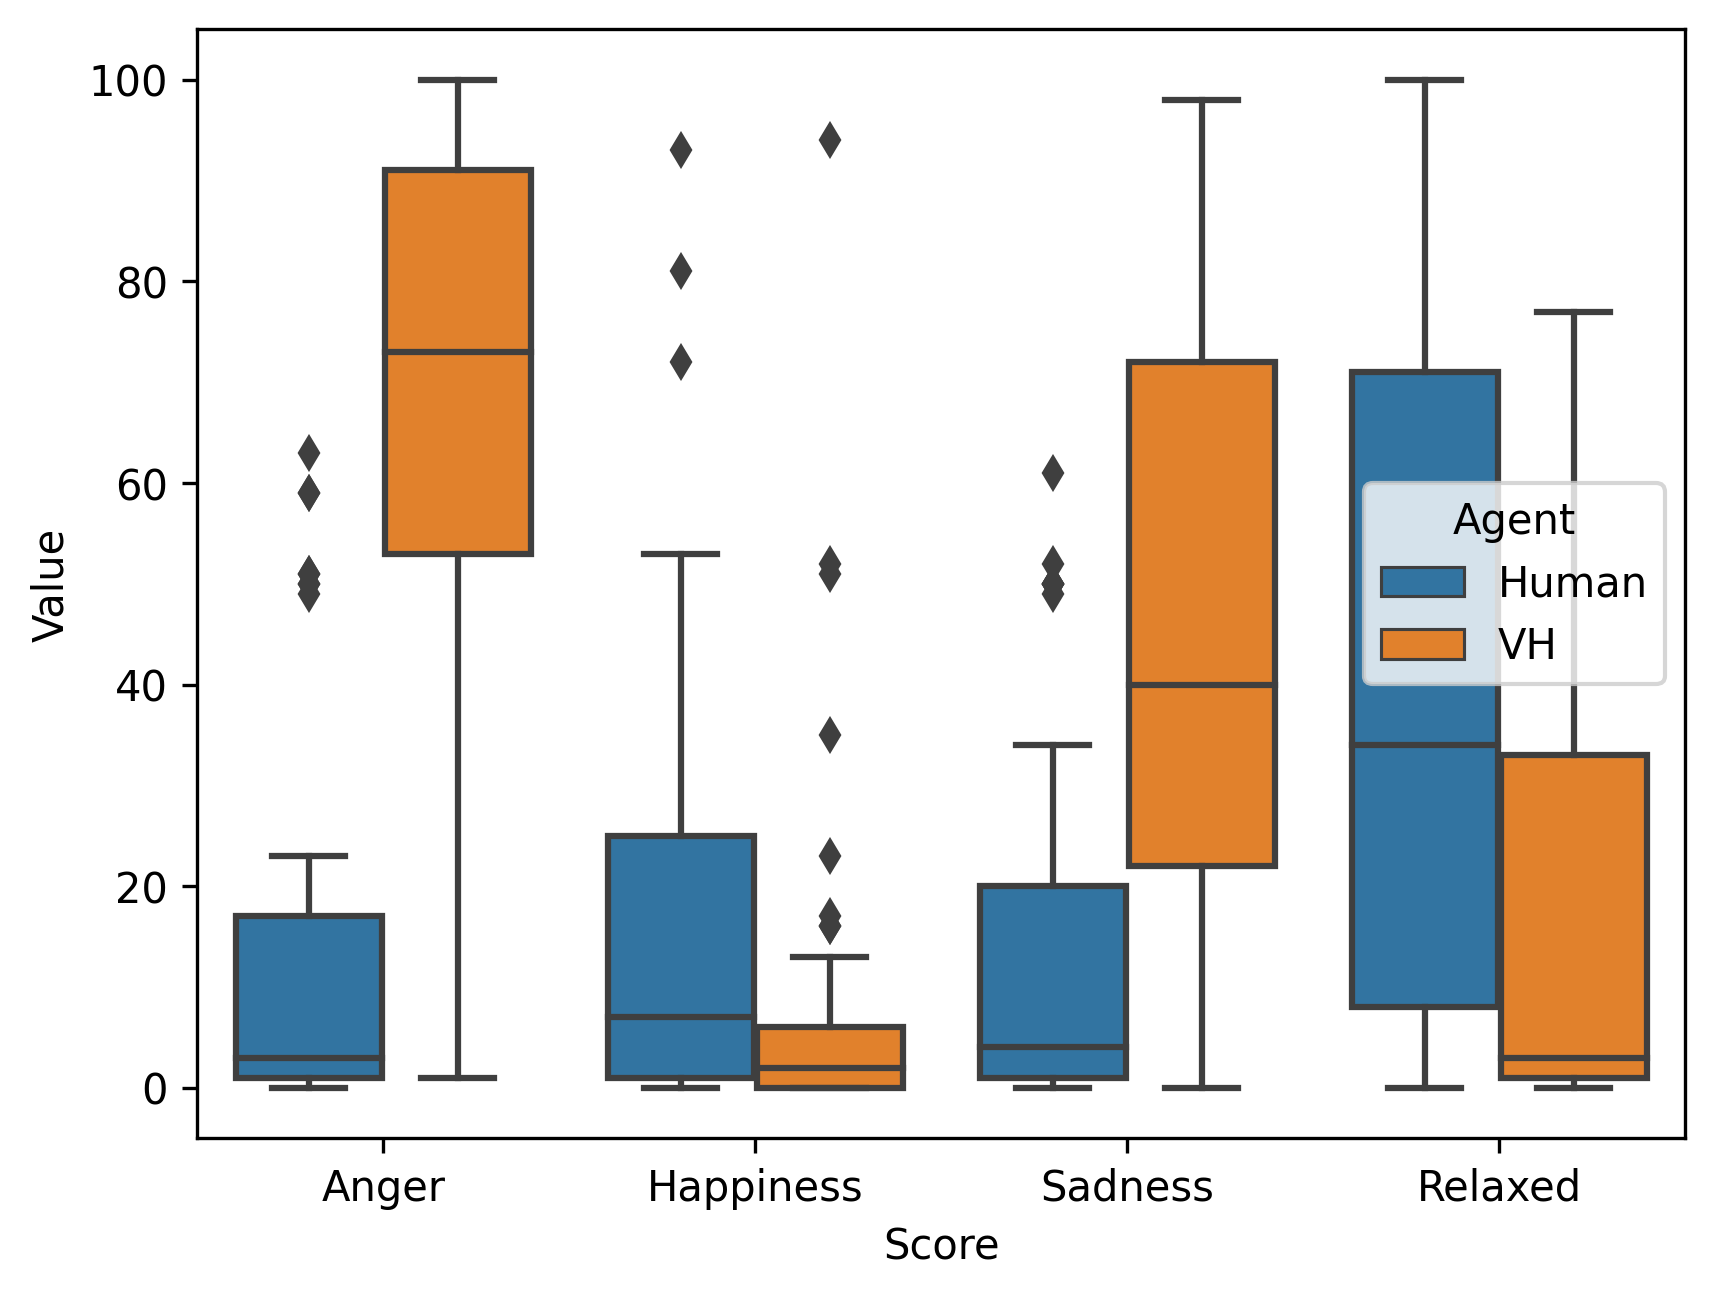

Happy


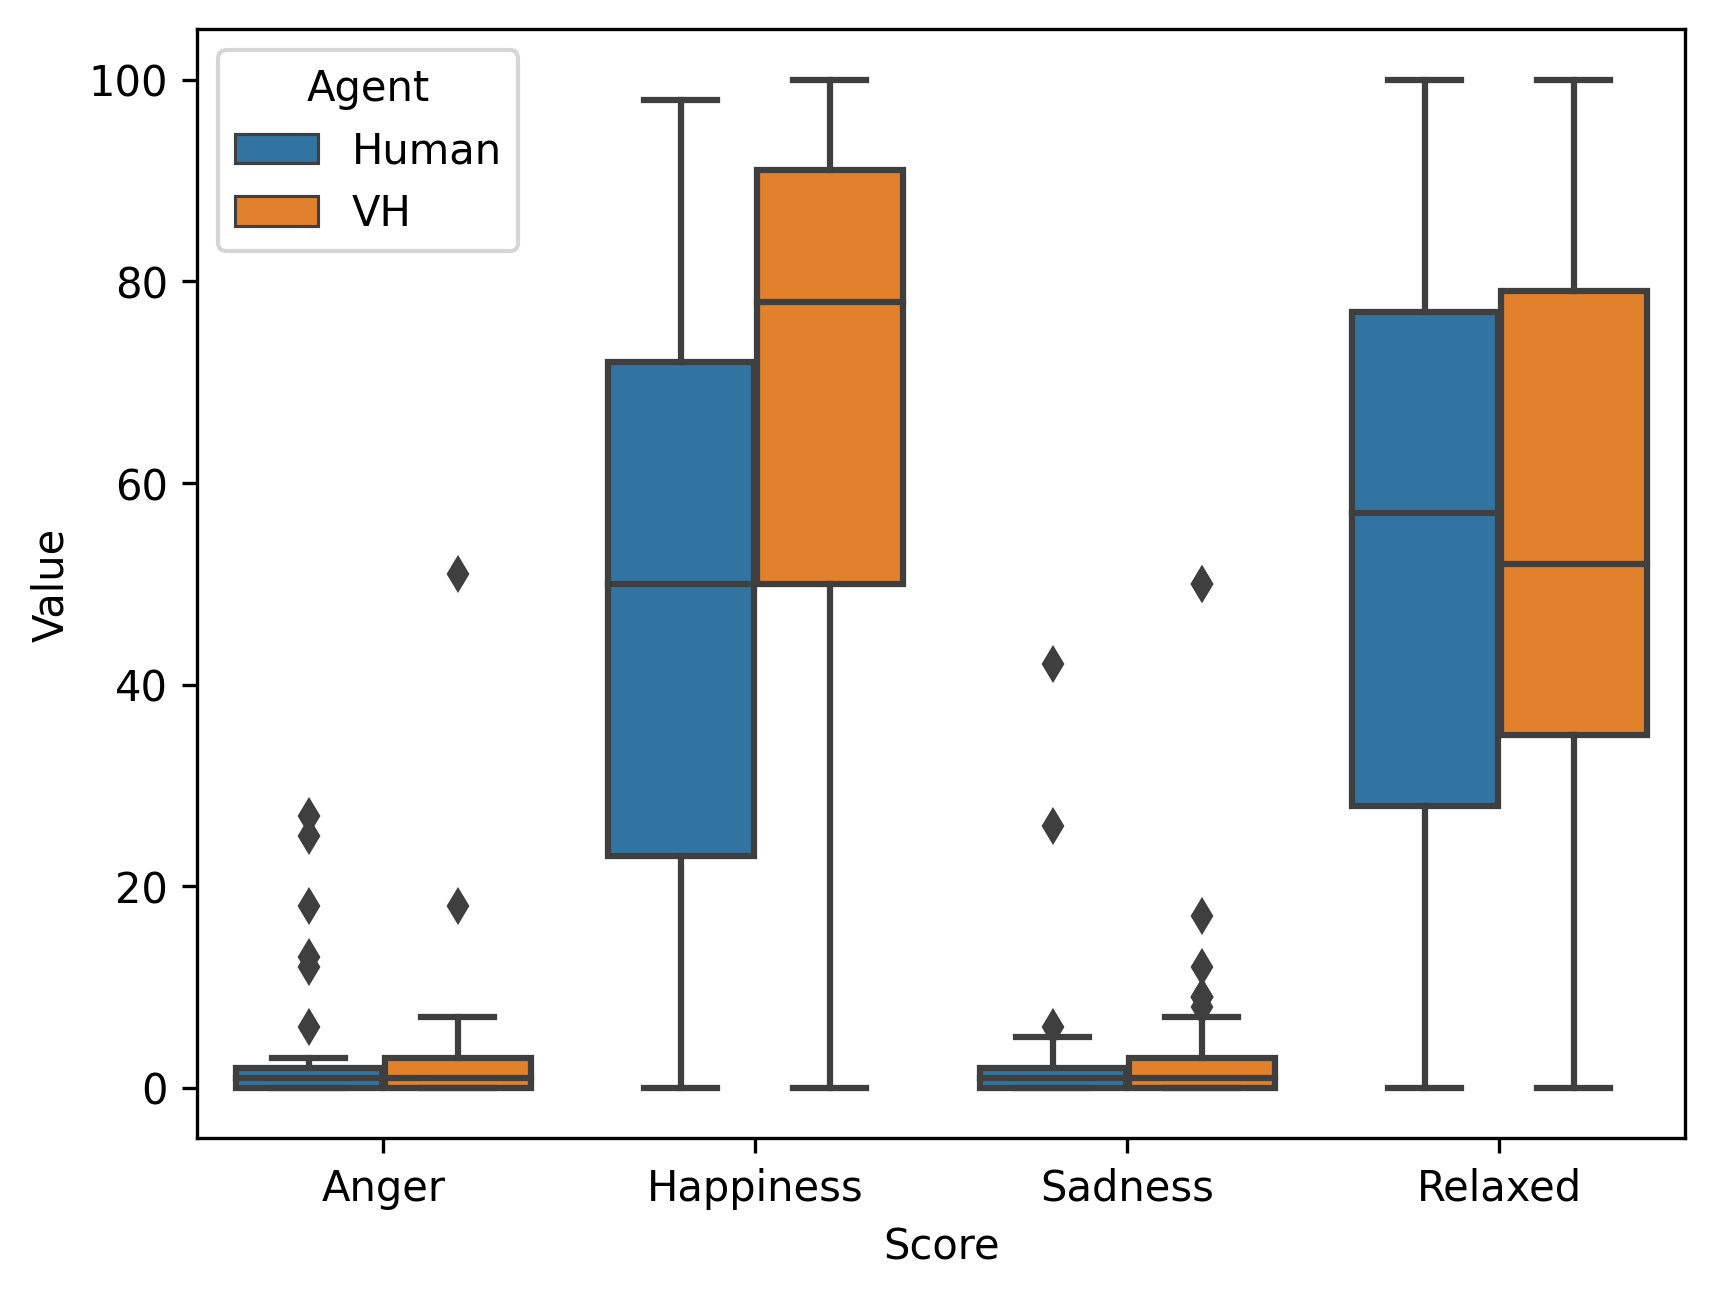

Sad


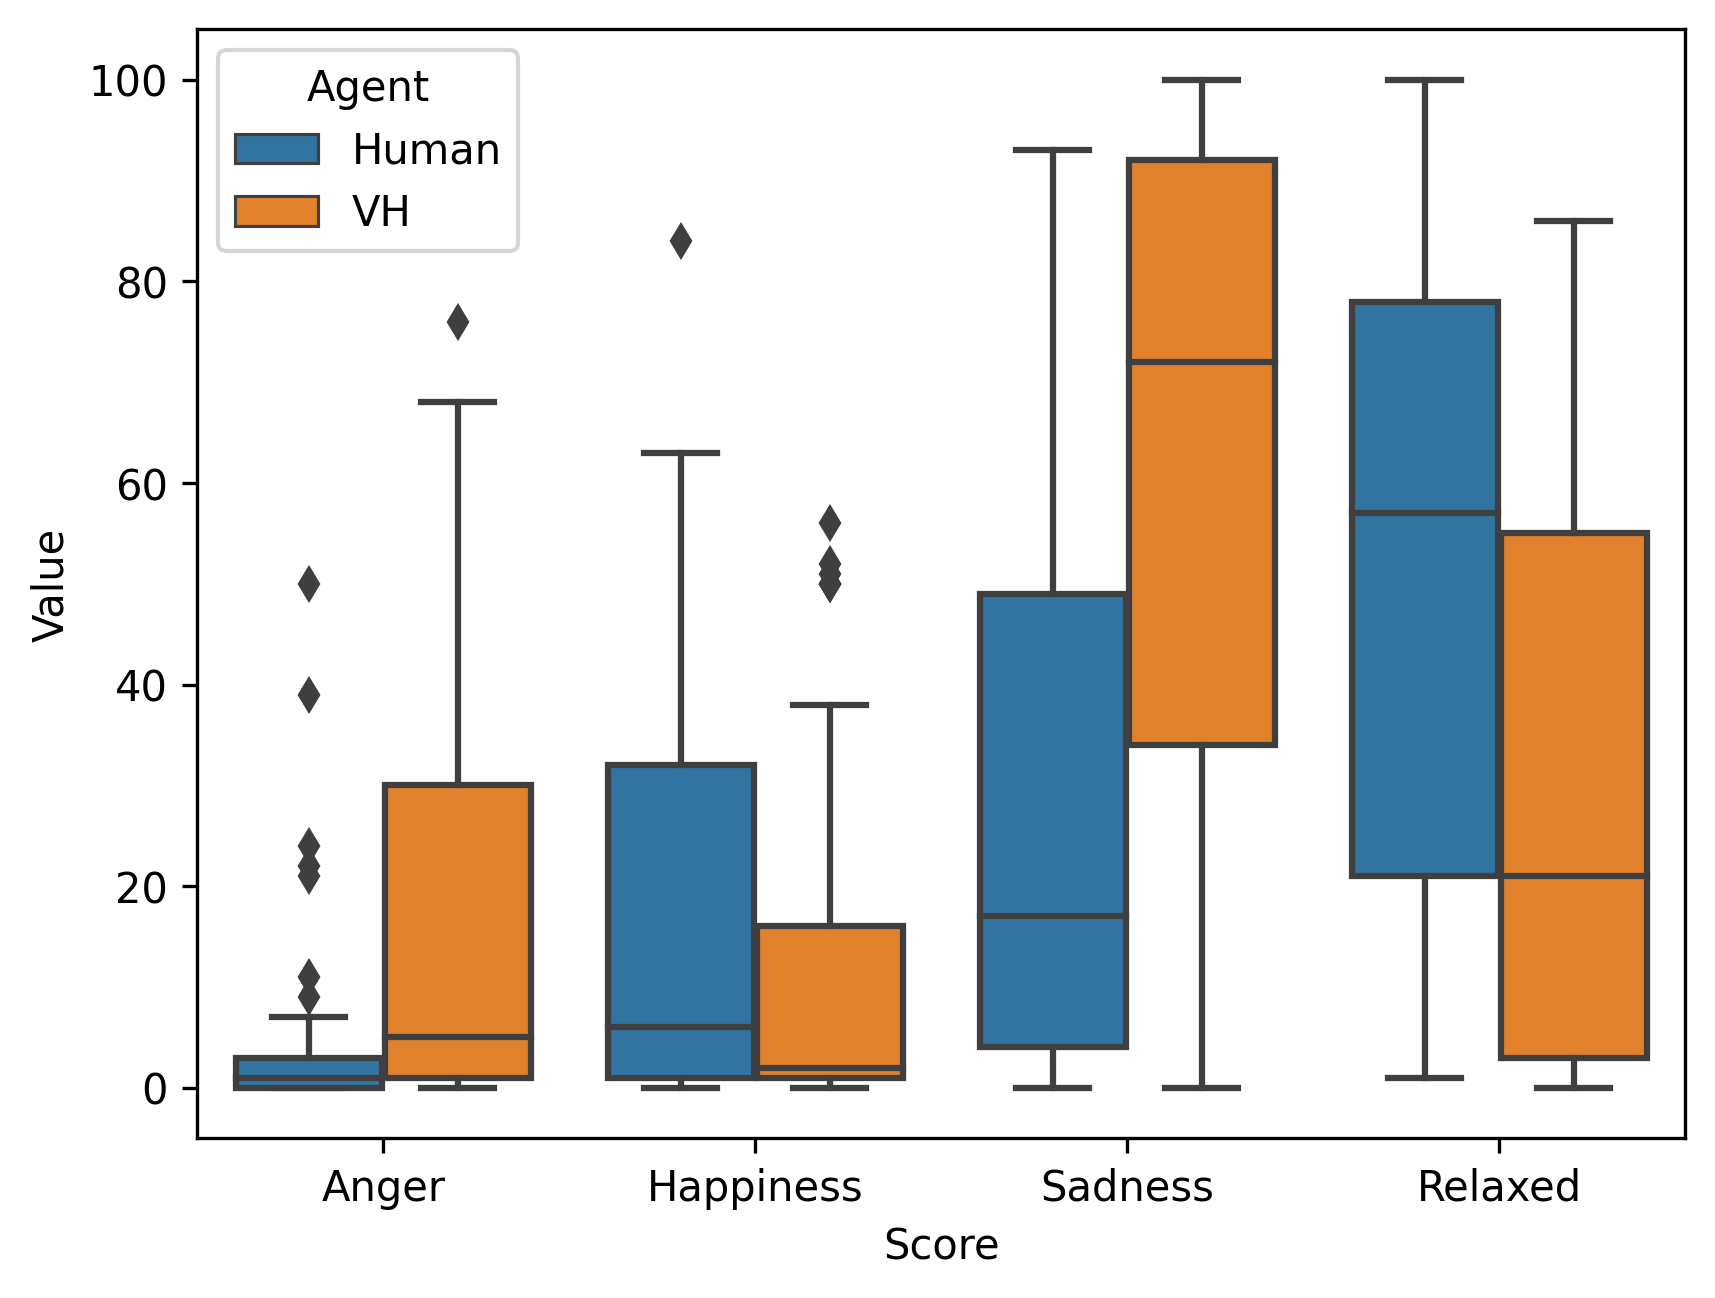

Relax


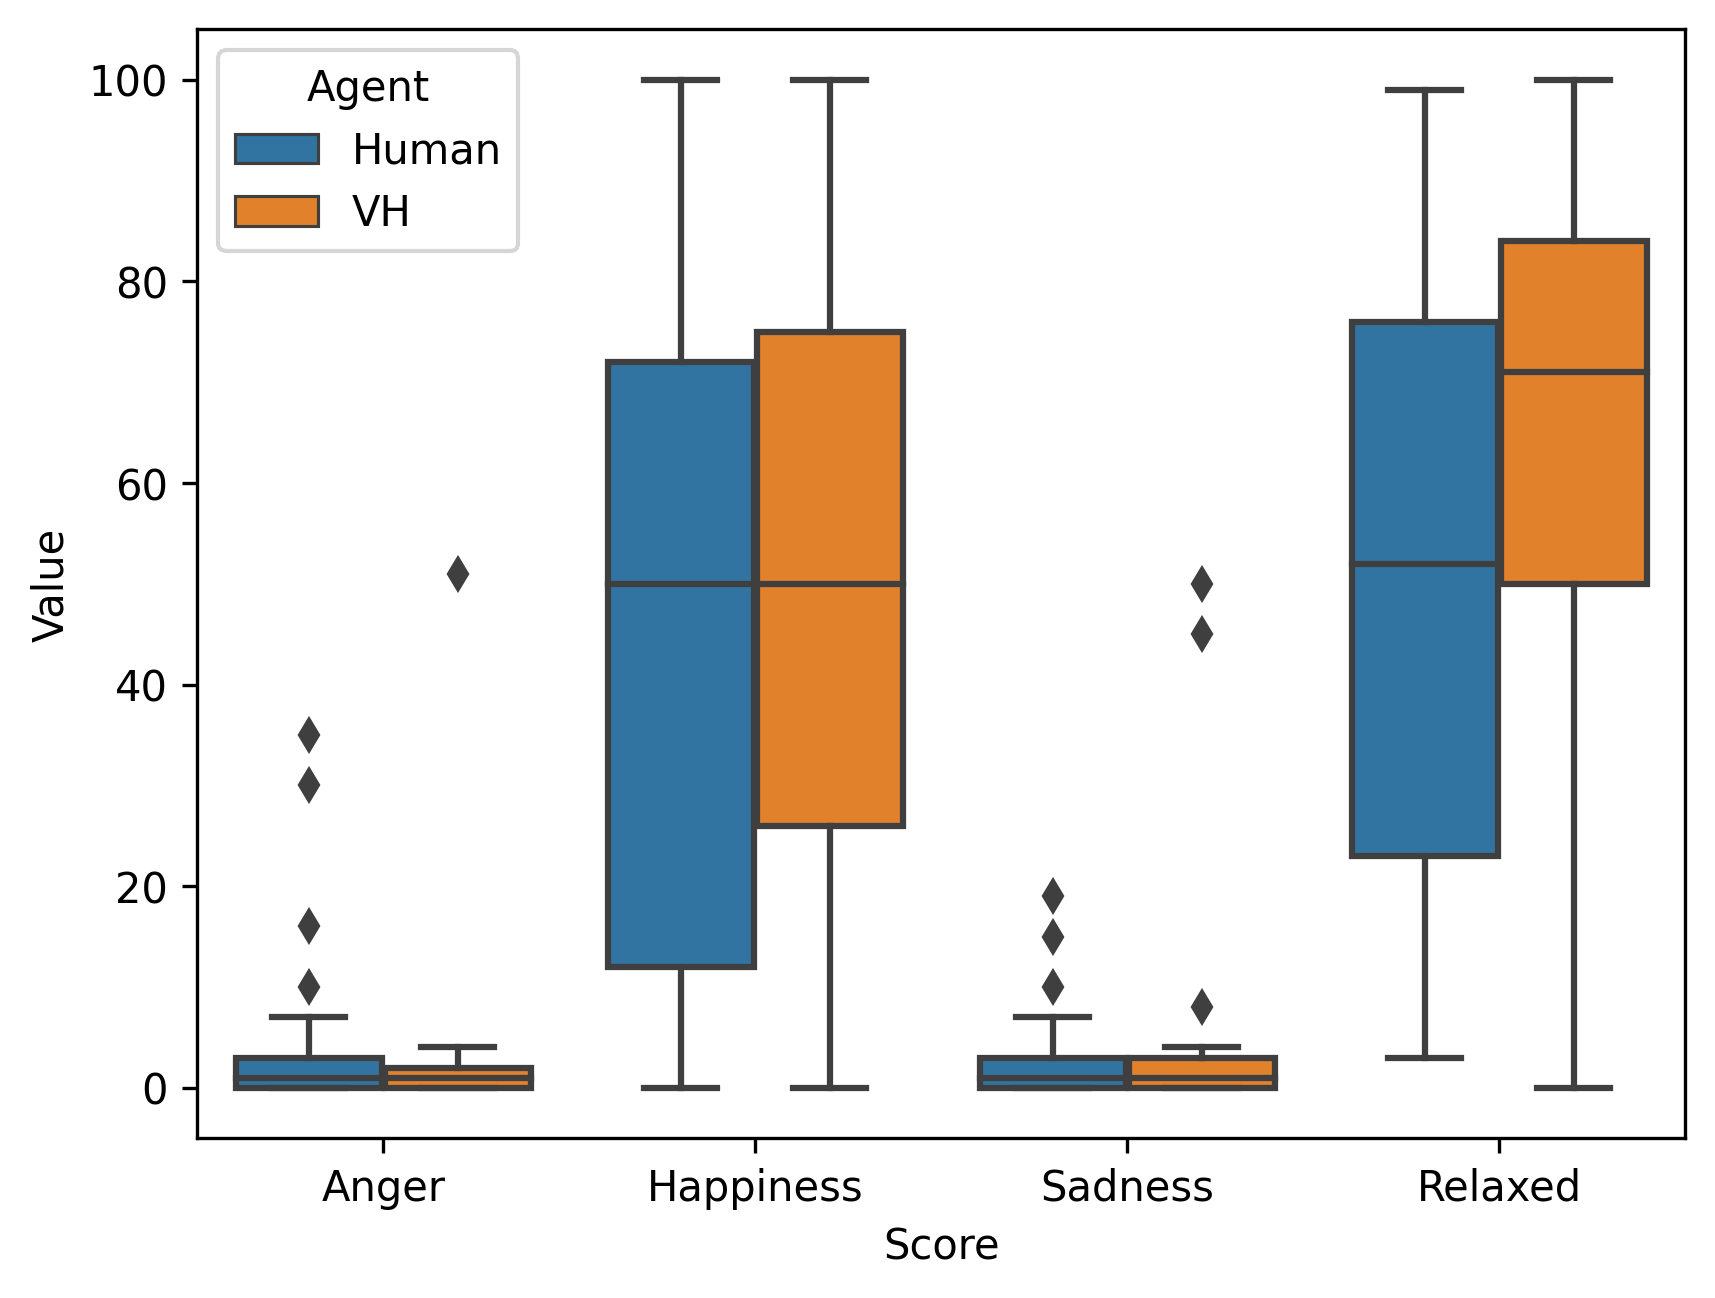

In [68]:
score_order = [
    "Anger", 
    # "Displeasure", 
    # "Fear", 
    "Happiness", 
    "Sadness",
    "Relaxed", 
    # "Surprise"
]

# Angry
print("Angry")
df_angry_vas_plot = achieve_vas_boxplot(df_angry)

plt.figure(dpi=300)

sns.boxplot(x="Score", y="Value", hue="Agent", data=df_angry_vas_plot, order=score_order)
plt.savefig("Results/Images/AngryVASBosplot.pdf", dpi=300, format="pdf")
plt.show()

# Happy
print("Happy")
df_happy_vas_plot= achieve_vas_boxplot(df_happy)

plt.figure(dpi=300)

sns.boxplot(x="Score", y="Value", hue="Agent", data=df_happy_vas_plot, order=score_order)
plt.savefig("Results/Images/HappyVASBosplot.pdf", dpi=300, format="pdf")
plt.show()

# Sad
print("Sad")
df_sad_vas_plot= achieve_vas_boxplot(df_sad)

plt.figure(dpi=300)

sns.boxplot(x="Score", y="Value", hue="Agent", data=df_sad_vas_plot, order=score_order)
plt.savefig("Results/Images/SadVASBosplot.pdf", dpi=300, format="pdf")
plt.show()

# Relax
print("Relax")
df_relax_vas_plot= achieve_vas_boxplot(df_relax)

plt.figure(dpi=300)

sns.boxplot(x="Score", y="Value", hue="Agent", data=df_relax_vas_plot, order=score_order)
plt.savefig("Results/Images/RelaxVASBosplot.pdf", dpi=300, format="pdf")
plt.show()

In [63]:
df_angry_vas_plot["Personality"] = "Angry"
df_happy_vas_plot["Personality"] = "Happy"
df_sad_vas_plot["Personality"] = "Sad"
df_relax_vas_plot["Personality"] = "Relax"

df_vase = pd.concat([df_angry_vas_plot, df_happy_vas_plot, df_sad_vas_plot, df_relax_vas_plot], axis=0).reset_index(drop=True)

In [64]:
personalities_list = ["Angry", "Happy", "Sad", "Relax"]
quest_list = list(df_angry_vas_plot["State"].unique())
agents_list = ["Human", "VH"]

In [65]:
result_vase_stat_list = []
for i_p, pers1 in enumerate(personalities_list[:-1]):
    for pers2 in personalities_list[(i_p+1):]:
        
        for q in quest_list:
            for ag in agents_list:
                
                cond_both = (df_vase["State"] == q) & (df_vase["Agent"] == ag)
                
                x1 = df_vase[cond_both & (df_vase["Personality"] == pers1)]["Value"].dropna().values
                x2 = df_vase[cond_both & (df_vase["Personality"] == pers2)]["Value"].dropna().values
                
                _, p_value = sp.stats.mannwhitneyu(x1, x2)
                p_value_str = aute.get_p_string(p_value)
                
                result_vase_stat_list.append({
                    "Personality_1": pers1,
                    "Personality_2": pers2,
                    "Question": q,
                    "Agent": ag,
                    "pvalue": p_value,
                    "pvalue_str": p_value_str,
                    "mean1": np.mean(x1),
                    "mean2": np.mean(x2),
                    "samples1": len(x1),
                    "samples2": len(x2)
                })
                
df_res_vase_pvalue = pd.DataFrame(result_vase_stat_list)
df_res_vase_pvalue

,Personality_1,Personality_2,Question,Agent,pvalue,pvalue_str,mean1,mean2,samples1,samples2
0,Angry,Happy,Disgusto,Human,2.475286e-05,***,22.326531,6.897959,49,49
1,Angry,Happy,Disgusto,VH,3.026023e-13,***,52.693878,3.326531,49,49
2,Angry,Happy,Felicidad,Human,2.807353e-07,***,17.204082,47.612245,49,49
3,Angry,Happy,Felicidad,VH,8.904200e-14,***,8.367347,66.448980,49,49
4,Angry,Happy,Enfado,Human,1.687270e-04,***,13.142857,2.877551,49,49
...,...,...,...,...,...,...,...,...,...,...
79,Sad,Relax,Relajado,VH,2.112047e-06,***,30.755102,63.122449,49,49
80,Sad,Relax,Sorpresa,Human,8.865322e-01,-,21.020408,22.693878,49,49
81,Sad,Relax,Sorpresa,VH,6.517447e-01,-,11.081633,15.469388,49,49
82,Sad,Relax,Tristeza,Human,3.508644e-08,***,24.000000,2.183673,49,49


In [90]:
df_res_vase_pvalue[df_res_vase_pvalue["pvalue_str"] == "-"]

,Personality_1,Personality_2,Question,Agent,pvalue,pvalue_str,mean1,mean2,samples1,samples2
6,Angry,Happy,Miedo,Human,0.185867,-,7.204082,3.775510,49,49
10,Angry,Happy,Sorpresa,Human,0.858759,-,26.489796,27.897959,49,49
14,Angry,Sad,Disgusto,Human,0.482379,-,22.326531,20.367347,49,49
15,Angry,Sad,Disgusto,VH,0.646562,-,52.693878,48.897959,49,49
16,Angry,Sad,Felicidad,Human,0.614970,-,17.204082,18.448980,49,49
17,Angry,Sad,Felicidad,VH,0.326756,-,8.367347,12.204082,49,49
20,Angry,Sad,Miedo,Human,0.450038,-,7.204082,3.326531,49,49
24,Angry,Sad,Sorpresa,Human,0.460862,-,26.489796,21.020408,49,49
25,Angry,Sad,Sorpresa,VH,0.475346,-,11.387755,11.081633,49,49
34,Angry,Relax,Miedo,Human,0.345719,-,7.204082,3.163265,49,49


In [91]:
df_res_vase_pvalue[
    (df_res_vase_pvalue["Personality_1"] == "Happy") & (df_res_vase_pvalue["Personality_2"] == "Relax")
]

,Personality_1,Personality_2,Question,Agent,pvalue,pvalue_str,mean1,mean2,samples1,samples2
56,Happy,Relax,Disgusto,Human,0.142922,-,6.897959,8.877551,49,49
57,Happy,Relax,Disgusto,VH,0.438869,-,3.326531,4.387755,49,49
58,Happy,Relax,Felicidad,Human,0.407519,-,47.612245,42.489796,49,49
59,Happy,Relax,Felicidad,VH,0.008343,**,66.448980,50.244898,49,49
60,Happy,Relax,Enfado,Human,0.656226,-,2.877551,3.142857,49,49
61,Happy,Relax,Enfado,VH,0.738318,-,2.816327,2.306122,49,49
62,Happy,Relax,Miedo,Human,0.614844,-,3.775510,3.163265,49,49
63,Happy,Relax,Miedo,VH,0.967281,-,3.591837,2.612245,49,49
64,Happy,Relax,Relajado,Human,0.606339,-,54.489796,51.959184,49,49
65,Happy,Relax,Relajado,VH,0.222694,-,54.959184,63.122449,49,49


## STAI-Y1

In [92]:
df_stai_y1 = pd.read_excel("../Cuestionarios/CHATBOTs_STAI-Y1.xlsx", skiprows=[1])
user_name_column = [
    user.replace("User", "USER") if isinstance(user, str) else np.nan for user in df_stai_y1["Usuario"].values
]
df_stai_y1["SubjectId"] = user_name_column
print("Shape", df_stai_y1.shape)
print("Columns", df_stai_y1.columns)

Shape (109, 31)
Columns Index(['respondent_id', 'collector_id', 'date_created', 'date_modified',
       'ip_address', 'email_address', 'first_name', 'last_name', 'custom_1',
       'Usuario',
       'A continuación, encontrará unas frases que se utilizan corrientemente para describirse uno a sí mismo. Lea cada frase y señale la puntuación de "nada" a "mucho" que indique mejor cómo se siente usted ahora mismo, en este momento. No hay respuestas buenas ni malas. No emplee demasiado tiempo en cada frase y conteste señalando la respuesta que mejor describa su situación actual.',
       'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14',
       'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22',
       'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26',
       'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29', 'SubjectId'],
      dtype='object')


## RME-18

In [9]:
df_rme_18 = pd.read_excel("../Cuestionarios/CHATBOTs_RME-18.xlsx", skiprows=[1])
print("Shape", df_rme_18.shape)
print("Columns", df_rme_18.columns)

Shape (112, 82)
Columns Index(['respondent_id', 'collector_id', 'date_created', 'date_modified',
       'ip_address', 'email_address', 'first_name', 'last_name', 'custom_1',
       'Usuario', 'Indique su respuesta', 'Unnamed: 11', 'Unnamed: 12',
       'Unnamed: 13', 'Indique su respuesta.1', 'Unnamed: 15', 'Unnamed: 16',
       'Unnamed: 17', 'Indique su respuesta.2', 'Unnamed: 19', 'Unnamed: 20',
       'Unnamed: 21', 'Indique su respuesta.3', 'Unnamed: 23', 'Unnamed: 24',
       'Unnamed: 25', 'Indique su respuesta.4', 'Unnamed: 27', 'Unnamed: 28',
       'Unnamed: 29', 'Indique su respuesta.5', 'Unnamed: 31', 'Unnamed: 32',
       'Unnamed: 33', 'Indique su respuesta.6', 'Unnamed: 35', 'Unnamed: 36',
       'Unnamed: 37', 'Indique su respuesta.7', 'Unnamed: 39', 'Unnamed: 40',
       'Unnamed: 41', 'Indique su respuesta.8', 'Unnamed: 43', 'Unnamed: 44',
       'Unnamed: 45', 'Indique su respuesta.9', 'Unnamed: 47', 'Unnamed: 48',
       'Unnamed: 49', 'Indique su respuesta.10', 'Un

## TECA

In [93]:
df_teca = pd.read_excel("../Cuestionarios/CHATBOTs_TECA.xlsx", skiprows=[1])
user_name_column = [
    user.replace("User", "USER") if isinstance(user, str) else np.nan for user in df_teca["Usuario"].values
]
df_teca["SubjectId"] = user_name_column
print("Shape", df_teca.shape)
print("Columns", df_teca.columns)

Shape (108, 44)
Columns Index(['respondent_id', 'collector_id', 'date_created', 'date_modified',
       'ip_address', 'email_address', 'first_name', 'last_name', 'custom_1',
       'Usuario',
       'Las siguientes frases se refieren a sus sentimientos y pensamientos en una variedad de situaciones. Indique cómo le describe cada situación eligiendo entre las opciones. Lea cada frase cuidadosamente antes de responder. Conteste honestamente con lo que más se identifique, ya que no hay respuestas correctas o incorrectas. No deje ninguna frase sin contestar.',
       'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14',
       'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22',
       'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26',
       'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30',
       'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33', 'Unnamed: 34',
       'Unnamed: 35', 'Unnamed: 36',

In [94]:
features_teca_list = [
    'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14',
    'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
    'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22',
    'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26',
    'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30',
    'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33', 'Unnamed: 34',
    'Unnamed: 35', 'Unnamed: 36', 'Unnamed: 37', 'Unnamed: 38',
    'Unnamed: 39', 'Unnamed: 40', 'Unnamed: 41', 'Unnamed: 42'
]

name_columns_teca_dict = {}
for i_f, feat in enumerate(features_teca_list):
    df_all_cuest["Feature_TECA_" + str(i_f+1)] = ""
    name_columns_teca_dict[feat] = "Feature_TECA_" + str(i_f+1)

    
for subj, df_subj in df_all_cuest.groupby("SubjectId"):
    for k, v in name_columns_teca_dict.items():
        df_all_cuest.loc[df_all_cuest["SubjectId"] == subj, v] = df_teca[df_teca["SubjectId"] == subj][k].values[0]

In [64]:
df_all_cuest["SubjectId"].unique()

array(['USER_48_CB2', 'USER_47_CB2', 'USER_45_CB2', 'USER_43_CB2',
       'USER_42_CB2', 'USER_38_CB2', 'USER_40_CB2', 'USER_24_CB2',
       'USER_17_CB2', 'USER_15_CB2', 'USER_12_CB2', 'USER_09_CB2',
       'USER_07_CB2', 'USER_06_CB2', 'USER_05_CB2', 'USER_04_CB2',
       'USER_03_CB2', 'USER_02_CB2', 'USER_01_CB2', 'USER_52_CB',
       'USER_51_CB', 'USER_50_CB', 'USER_49_CB', 'USER_48_CB',
       'USER_47_CB', 'USER_46_CB', 'USER_45_CB', 'USER_44_CB',
       'USER_43_CB', 'USER_42_CB', 'USER_41_CB', 'USER_40_CB',
       'USER_39_CB', 'USER_38_CB', 'USER_37_CB', 'USER_36_CB',
       'USER_35_CB', 'USER_34_CB', 'USER_33_CB', 'USER_30_CB',
       'USER_29_CB', 'USER_28_CB', 'USER_27_CB', 'USER_25_CB',
       'USER_24_CB', 'USER_23_CB', 'USER_22_CB', 'USER_21_CB',
       'USER_20_CB', 'USER_19_CB', 'USER_18_CB', 'USER_17_CB',
       'USER_15_CB', 'USER_14_CB', 'USER_13_CB', 'USER_10_CB',
       'USER_09_CB', 'USER_07_CB', 'USER_05_CB', 'USER_03_CB',
       'USER_02_CB', 'USER_01_CB', '

In [76]:
df_teca["Usuario"].unique()

array(['USER_50_CB2', 'USER_49_CB2', 'USER_48_CB2', 'USER_47_CB2',
       'USER_46_CB2', 'USER_45_CB2', 'USER_44_CB2', 'USER_43_CB2',
       'USER_42_CB2', 'USER_41_CB2', 'USER_40_CB2', 'USER_39_CB2',
       'USER_38_CB2', 'USER_37_CB2', 'USER_36_CB2', 'USER_35_CB2',
       'USER_34_CB2', 'USER_33_CB2', 'USER_32_CB2', 'USER_31_CB2',
       'USER_30_CB2', 'USER_29_CB2', 'USER_28_CB2', 'USER_27_CB2',
       'USER_26_CB2', 'USER_25_CB2', 'USER_24_CB2', 'USER_23_CB2',
       'USER_22_CB2', 'USER_21_CB2', 'USER_20_CB2', 'USER_19_CB2',
       'USER_18_CB2', 'USER_17_CB2', 'USER_16_CB2', 'USER_15_CB2',
       'USER_13_CB2', 'USER_12_CB2', 'USER_11_CB2', 'USER_10_CB2',
       'User_09_CB2', 'User_08_CB2', 'User_07_CB2', 'User_06_CB2',
       'User_05_CB2', 'User_04_CB2', 'USER_03_CB2', 'USER_02_CB2',
       'USER_01_CB2', 'USER_PILOTO01_CB2', 'User_52_CB', 'User_51_CB',
       'User_50_CB', 'User_49_CB', 'User_48_CB', 'User_47_CB',
       'User_46_CB', 'User_45_CB', 'User_44_CB', 'User_43_CB',

In [62]:
subj

'USER_03_CB2(OK)'

In [16]:
df_teca["Unnamed: 11"].unique()

array(['Totalmente de acuerdo', 'Neutro', 'Algo de acuerdo',
       'Totalmente en desacuerdo'], dtype=object)

In [59]:
df_all_cuest["Usuario"]

0      USER_48_CB2
1      USER_47_CB2
2      USER_45_CB2
3      USER_43_CB2
4      USER_42_CB2
          ...     
370     User_46_CB
371     User_45_CB
372     User_44_CB
373     User_43_CB
374     User_42_CB
Name: Usuario, Length: 375, dtype: object

In [56]:
df_all_cuest

,Unnamed: 0,respondent_id,collector_id,date_created,date_modified,ip_address,email_address,first_name,last_name,custom_1,...,Sorpresa,Tristeza,Disgusto.1,Felicidad.1,Enfado.1,Miedo.1,Relajado.1,Sorpresa.1,Tristeza.1,Personality
0,2,114255723924,423466585,2023-02-27 12:28:31,2023-02-27 12:33:02,158.42.142.216,NaN,NaN,NaN,NaN,...,0.0,1.0,53.0,3.0,71.0,0.0,0.0,0.0,52.0,Angry
1,3,114255660291,423466585,2023-02-27 10:47:11,2023-02-27 10:53:28,158.42.142.216,NaN,NaN,NaN,NaN,...,0.0,0.0,4.0,43.0,3.0,1.0,16.0,1.0,4.0,Angry
2,5,114253818435,423466585,2023-02-24 12:41:40,2023-02-24 12:46:37,158.42.142.216,NaN,NaN,NaN,NaN,...,8.0,8.0,11.0,40.0,28.0,13.0,51.0,13.0,25.0,Angry
3,7,114252811380,423466585,2023-02-23 13:51:21,2023-02-23 13:55:55,158.42.142.216,NaN,NaN,NaN,NaN,...,1.0,2.0,50.0,2.0,96.0,2.0,1.0,1.0,90.0,Angry
4,8,114252748369,423466585,2023-02-23 12:14:49,2023-02-23 12:24:02,158.42.142.216,NaN,NaN,NaN,NaN,...,57.0,40.0,31.0,14.0,41.0,37.0,26.0,14.0,41.0,Angry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370,58,118202599738,448474933,2022-12-16 09:42:53,2022-12-16 09:58:46,158.42.69.160,NaN,NaN,NaN,NaN,...,51.0,0.0,0.0,0.0,0.0,0.0,99.0,0.0,0.0,Neutral2
371,59,118201795982,448474933,2022-12-15 14:11:34,2022-12-15 14:18:58,158.42.69.160,NaN,NaN,NaN,NaN,...,2.0,3.0,2.0,19.0,2.0,2.0,26.0,2.0,3.0,Neutral2
372,60,118201726662,448474933,2022-12-15 12:10:56,2022-12-15 12:25:13,158.42.69.160,NaN,NaN,NaN,NaN,...,34.0,0.0,1.0,64.0,0.0,0.0,0.0,1.0,15.0,Neutral2
373,61,118201670776,448474933,2022-12-15 10:20:47,2022-12-15 10:27:56,158.42.69.160,NaN,NaN,NaN,NaN,...,22.0,6.0,3.0,10.0,2.0,8.0,18.0,9.0,3.0,Neutral2


## VAS-E

In [13]:
df_vase_pre = pd.read_excel("../Cuestionarios/CHATBOTs_VAS-E.xlsx", skiprows=[1])
print("Shape", df_vase_pre.shape)
print("Columns", df_vase_pre.columns)

Shape (110, 17)
Columns Index(['respondent_id', 'collector_id', 'date_created', 'date_modified',
       'ip_address', 'email_address', 'first_name', 'last_name', 'custom_1',
       'Usuario', 'Disgusto', 'Felicidad', 'Enfado', 'Miedo', 'Relajado',
       'Sorpresa', 'Tristeza'],
      dtype='object')


In [ ]:
import numpy as np
from scipy.stats import kruskal, rankdata

# Example data for three groups
group1 = np.array([1, 2, 3, 4, 5])
group2 = np.array([2, 4, 6, 8, 10])
group3 = np.array([3, 6, 9, 12, 15])

# Kruskal-Wallis test
statistic, p_value = kruskal(group1, group2, group3)
print("Kruskal-Wallis test p-value:", p_value)

# Dunn's test
all_data = np.concatenate((group1, group2, group3))
ranks = rankdata(all_data)
n1, n2, n3 = len(group1), len(group2), len(group3)

def dunn_test(group1, group2, ranks, n1, n2):
    diff = np.abs(np.mean(ranks[group1]) - np.mean(ranks[group2]))
    denominator = np.sqrt((n1 * (n1 + 1) * (n1 + 2) / 12) * (1 / n1 + 1 / n2))
    z_value = diff / denominator
    return z_value

z_value1 = dunn_test(group1, group2, ranks, n1, n2)
z_value2 = dunn_test(group1, group3, ranks, n1, n3)
z_value3 = dunn_test(group2, group3, ranks, n2, n3)

# Bonferroni correction
adjusted_alpha = 0.05 / 3  # Three pairwise comparisons
adjusted_p_values = [adjusted_alpha, adjusted_alpha, adjusted_alpha]

p_values = [2 * (1 - norm.cdf(np.abs(z))) for z in [z_value1, z_value2, z_value3]]
significant_comparisons = [p < adjusted_p for p, adjusted_p in zip(p_values, adjusted_p_values)]

print("Dunn's test z-values:", z_value1, z_value2, z_value3)
print("Dunn's test p-values:", p_values)
print("Significant comparisons:", significant_comparisons)